In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
def read_signals(filename):
    samples_count = 5000

    c = ['name', 'x', 'y']
    for i in range(0, samples_count):
        c.append(f'v{i}')
    c = c + ['cluster', 'p0', 'p1', 'p2', 'p3']
    types = {col_name: int for col_name in ['name', 'cluster', 'p0', 'p1', 'p2', 'p3']}
    types.update({col_name: np.float32 for col_name in ['x', 'y', *[f'v{i}' for i in range(0, samples_count)]]})
    
    df = pd.read_csv(filename, names=c, dtype=types)
    df = df.set_index('name', drop=True)

    return df


def write_signals(df, filename):
    df.to_csv(filename, header=False)

In [3]:
url='https://drive.google.com/file/d/15kAQDCxV8YzdvIp_6K1_eKbMPtI9z70H/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
#data = pd.read_csv(url)
data = read_signals(url)

In [4]:
data.head()

x            y     v0     v1     v2     v3     v4     v5  \
name                                                                       
168   3642.316895  -107.175003  0.558  0.595  0.519  0.742  0.664  0.467   
307   4034.298096  -668.197998  0.650  0.457  0.572  0.644  0.581  0.525   
668   4358.000977  1703.198975  0.638  0.621  0.646  0.495  0.510  0.611   
229   2786.060059    75.125000  0.917  0.917  0.916  0.912  0.908  0.905   
316    988.637024  -492.056000  0.359  0.364  0.379  0.396  0.404  0.405   

         v6     v7  ...  v4995  v4996  v4997  v4998  v4999  cluster  p0  p1  \
name                ...                                                       
168   0.426  0.448  ...  0.606  0.523  0.607  0.629  0.664       -1  -1  -1   
307   0.645  0.515  ...  0.397  0.579  0.636  0.570  0.530       -1  -1  -1   
668   0.574  0.601  ...  0.569  0.587  0.541  0.412  0.519       -1  -1  -1   
229   0.904  0.904  ...  0.943  0.943  0.943  0.943  0.943       -1  -1  -1   
316   0.392  0.371  ...  0.626  0.606  0.629  0.674  0.727       -1  -1  -1   

      p2  p3  
name          
168   -1  -1  
307   -1  -1  
668   -1  -1  
229   -1  -1  
316   -1  -1  

[5 rows x 5007 columns]

In [ ]:
i = 0
for i in range(0, 5000-1, 1): 
    data["v"+str(10000+i)] = data['v'+str(i)] - data['v'+str(i+1)]
for i in range(0, 5000-3, 1): 
    data["v"+str(20000+i)] = data['v'+str(i)] - data['v'+str(i+2)]
for i in range(0, 5000-4, 1): 
    data["v"+str(30000+i)] = data['v'+str(i)] - data['v'+str(i+3)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

In [ ]:
data.shape

(760, 19999)

In [ ]:
data.head()

x            y     v0     v1     v2     v3     v4     v5  \
name                                                                       
168   3642.316895  -107.175003  0.558  0.595  0.519  0.742  0.664  0.467   
307   4034.298096  -668.197998  0.650  0.457  0.572  0.644  0.581  0.525   
668   4358.000977  1703.198975  0.638  0.621  0.646  0.495  0.510  0.611   
229   2786.060059    75.125000  0.917  0.917  0.916  0.912  0.908  0.905   
316    988.637024  -492.056000  0.359  0.364  0.379  0.396  0.404  0.405   

         v6     v7  ...  v34986  v34987  v34988  v34989  v34990  v34991  \
name                ...                                                   
168   0.426  0.448  ...   0.008  -0.013   0.019   0.020   0.060   0.011   
307   0.645  0.515  ...   0.021   0.017   0.234  -0.016   0.007  -0.012   
668   0.574  0.601  ...   0.254   0.038  -0.022  -0.071  -0.008  -0.016   
229   0.904  0.904  ...   0.000   0.000   0.000   0.000   0.000   0.000   
316   0.392  0.371  ...  -0.096  -0.067   0.001   0.066   0.095   0.082   

      v34992  v34993  v34994  v34995  
name                                  
168   -0.042   0.012  -0.047  -0.023  
307    0.194   0.047  -0.128  -0.173  
668   -0.093  -0.007   0.080   0.157  
229    0.000   0.000   0.000   0.000  
316    0.042   0.031  -0.005  -0.048  

[5 rows x 19999 columns]

In [ ]:
dataset = data.drop(columns=["x", "y"])
train_set = dataset[dataset['cluster']!=-1]
test_set = dataset[dataset['cluster']==-1]

In [ ]:
X_train_set = train_set.drop(columns=["cluster", "p0","p1","p2","p3"])
Y_train_set = train_set.cluster

X_test_set = test_set.drop(columns=["cluster", "p0","p1","p2","p3"])
Y_test_set = test_set.cluster

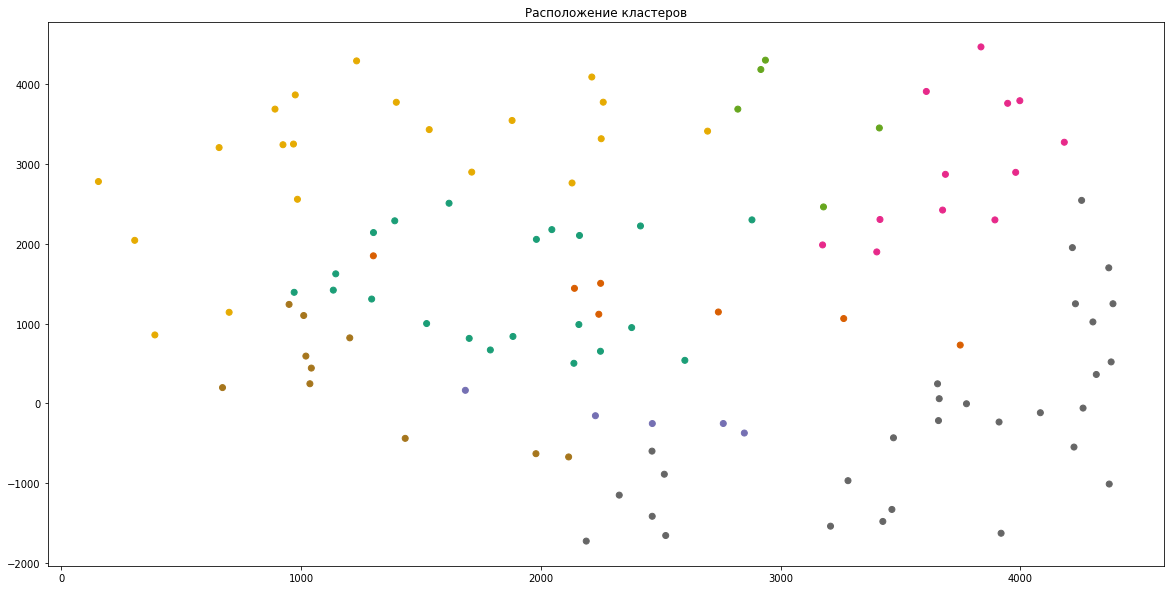

Обзор кластера 0


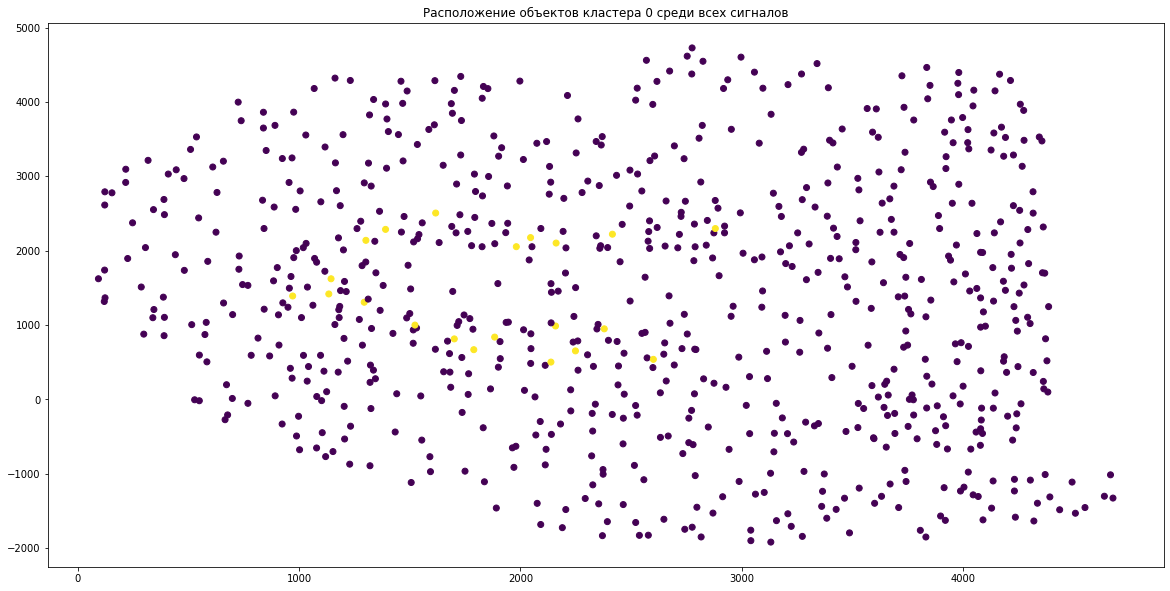

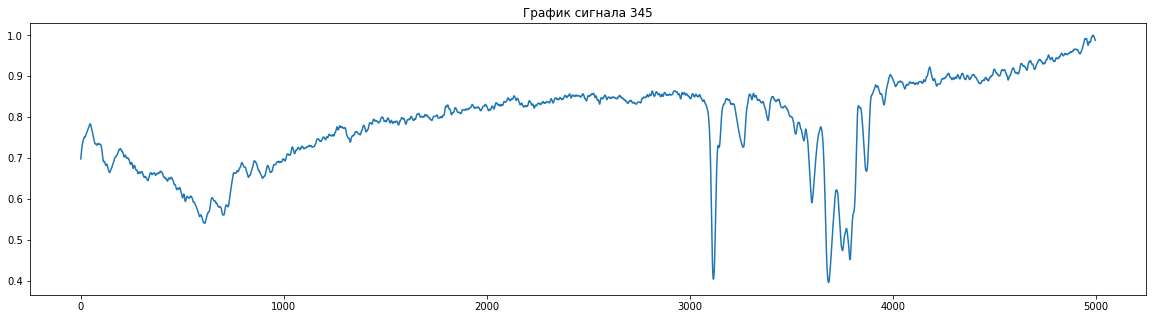

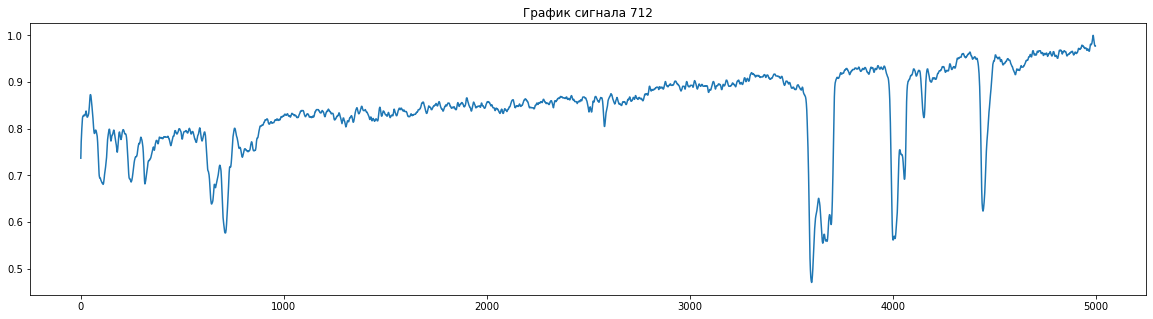

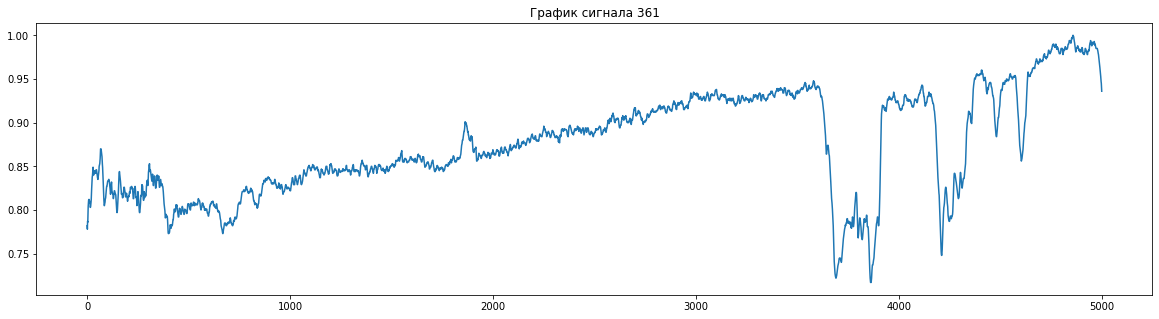

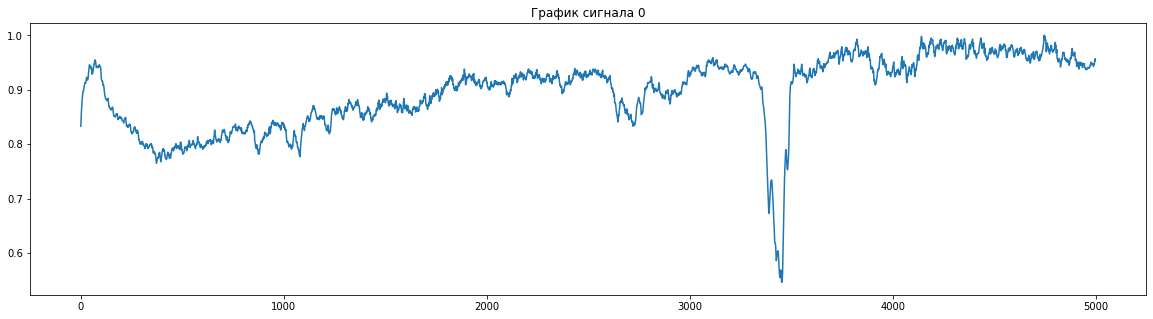

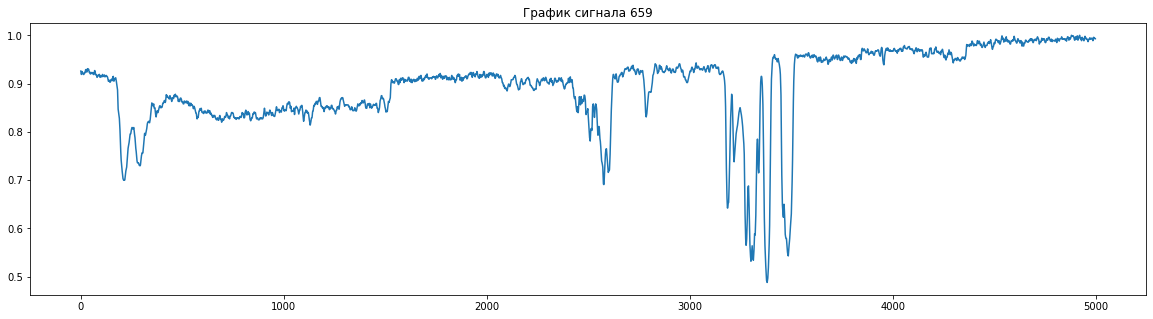

Обзор кластера 1


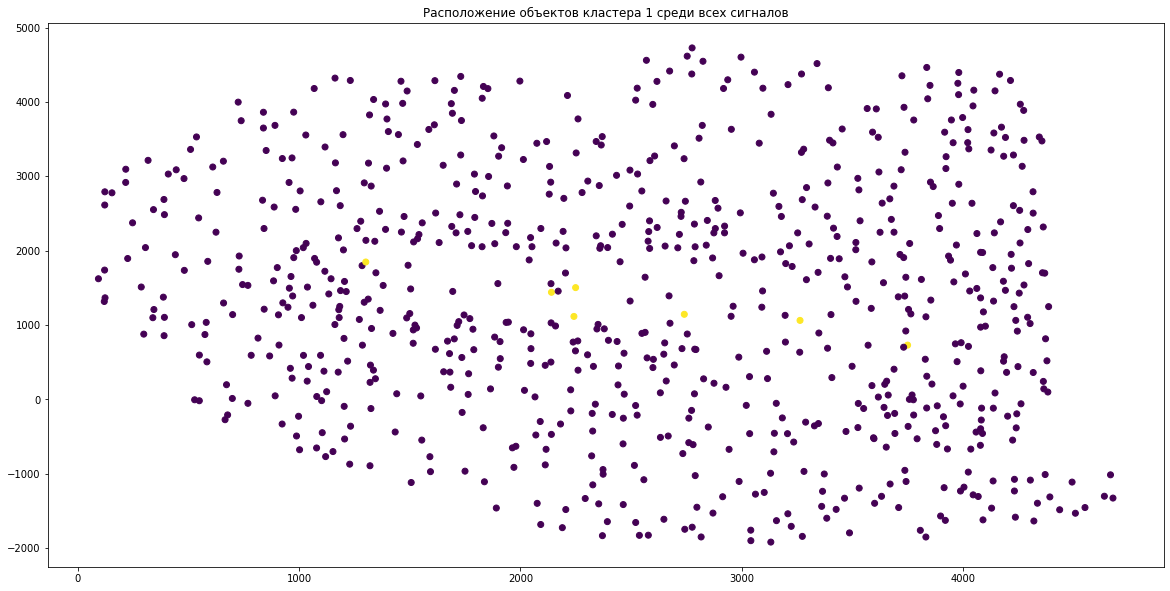

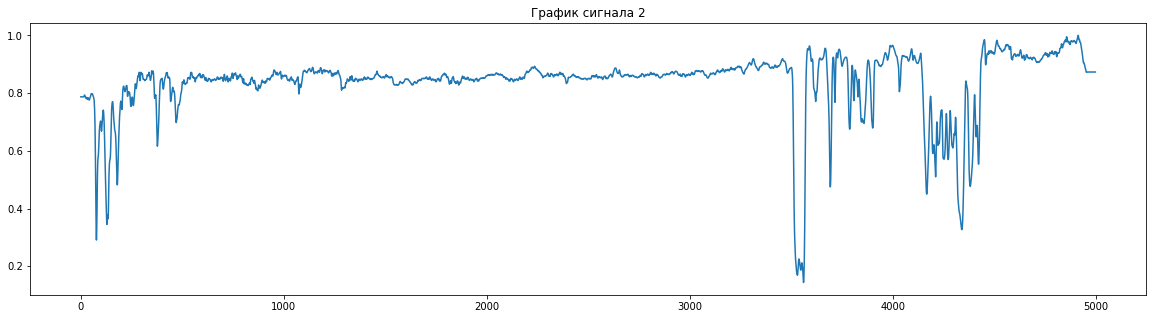

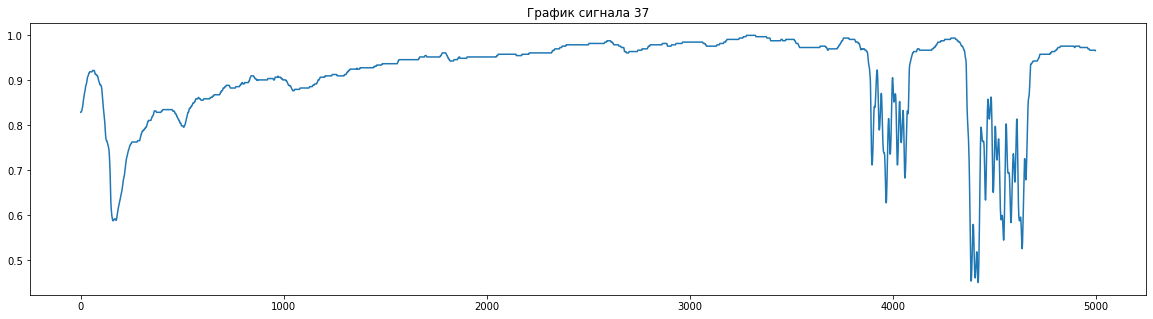

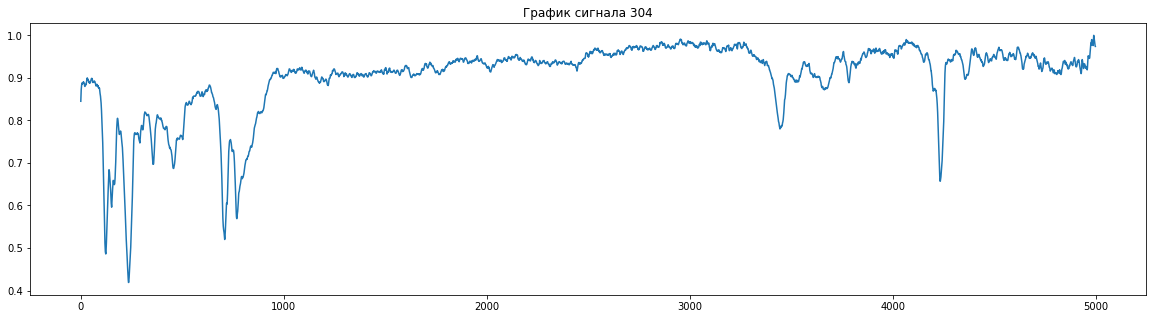

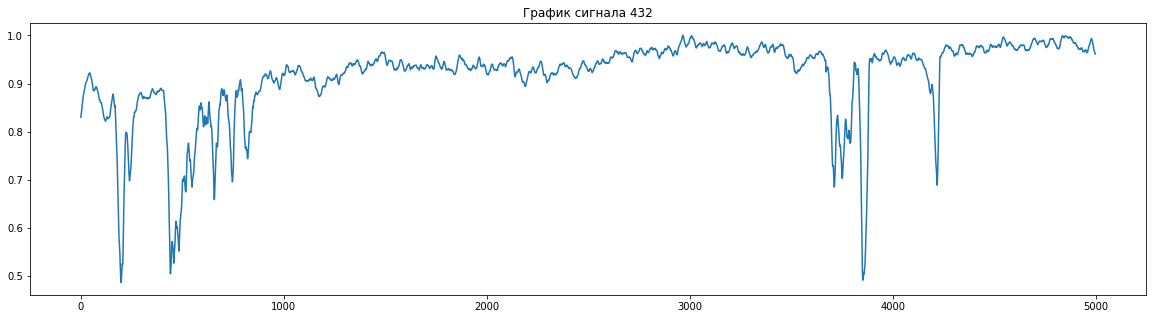

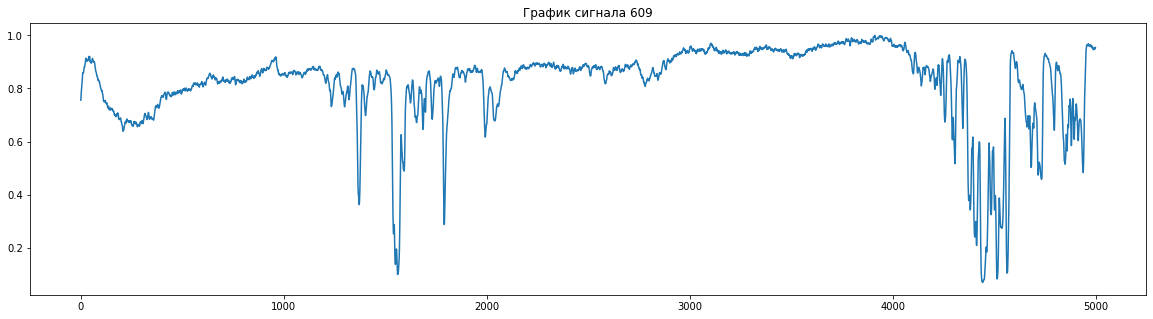

Обзор кластера 2


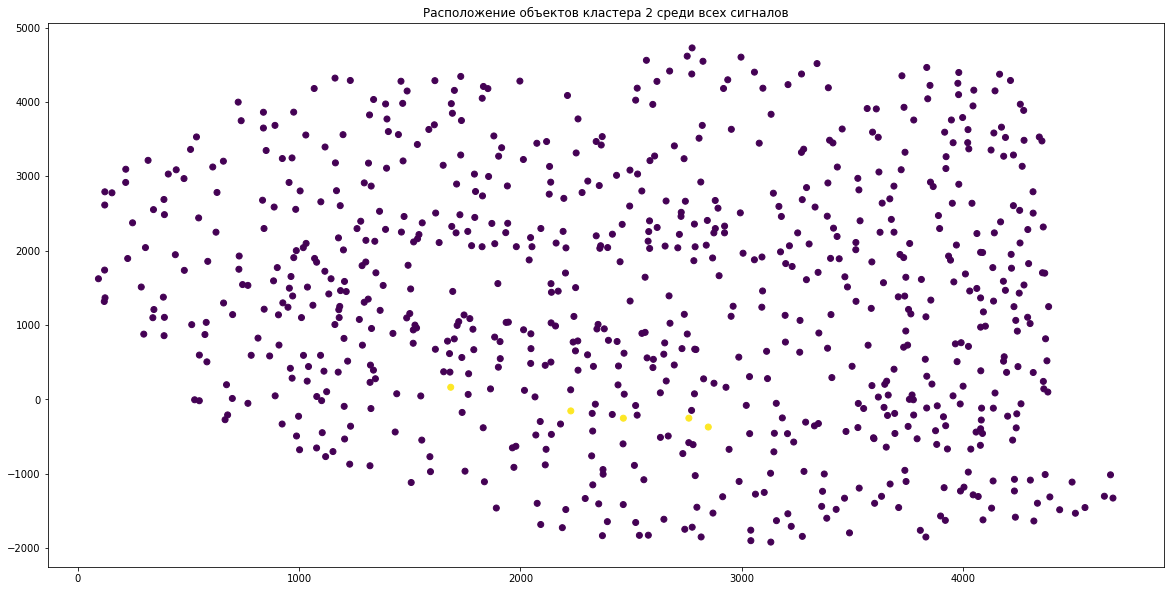

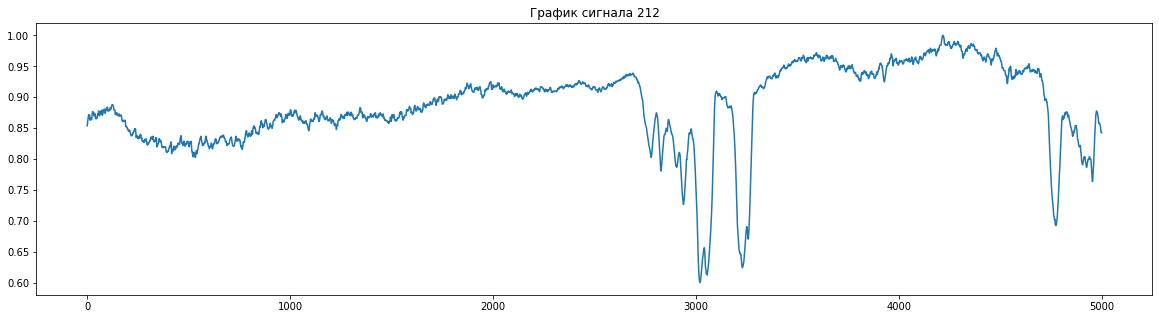

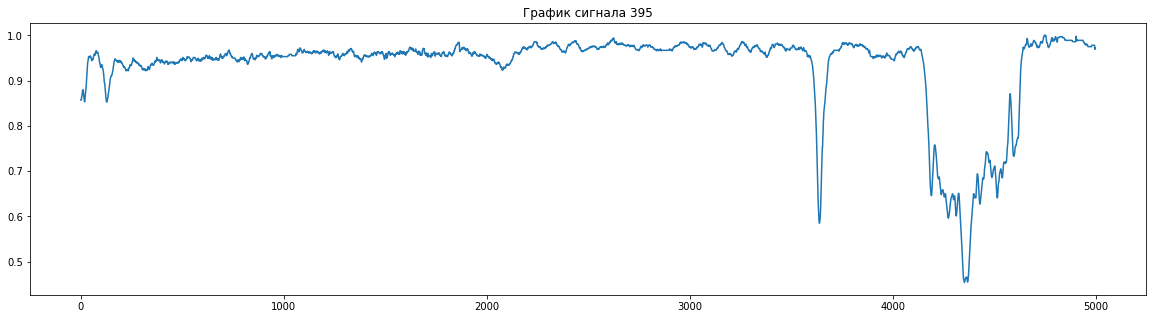

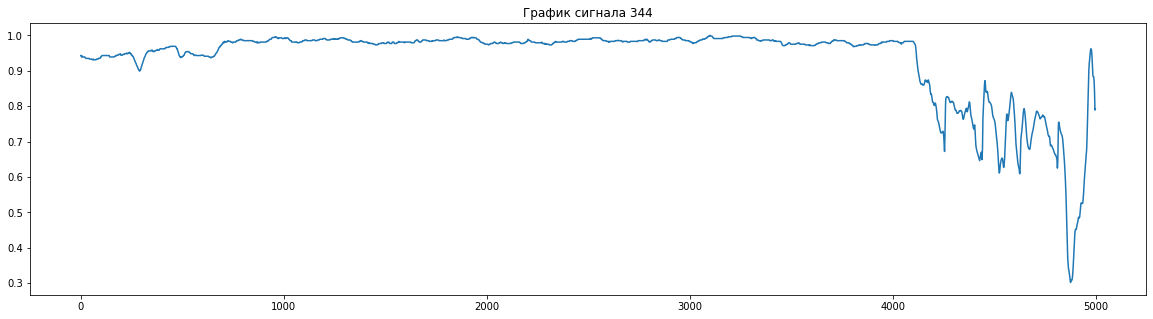

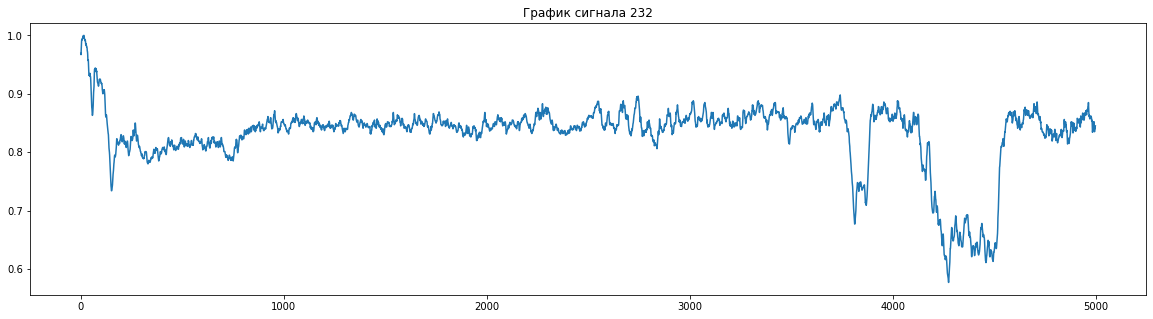

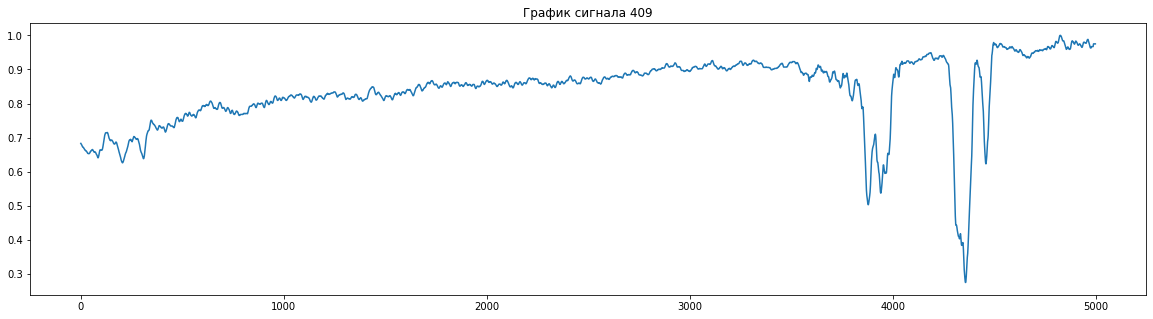

Обзор кластера 3


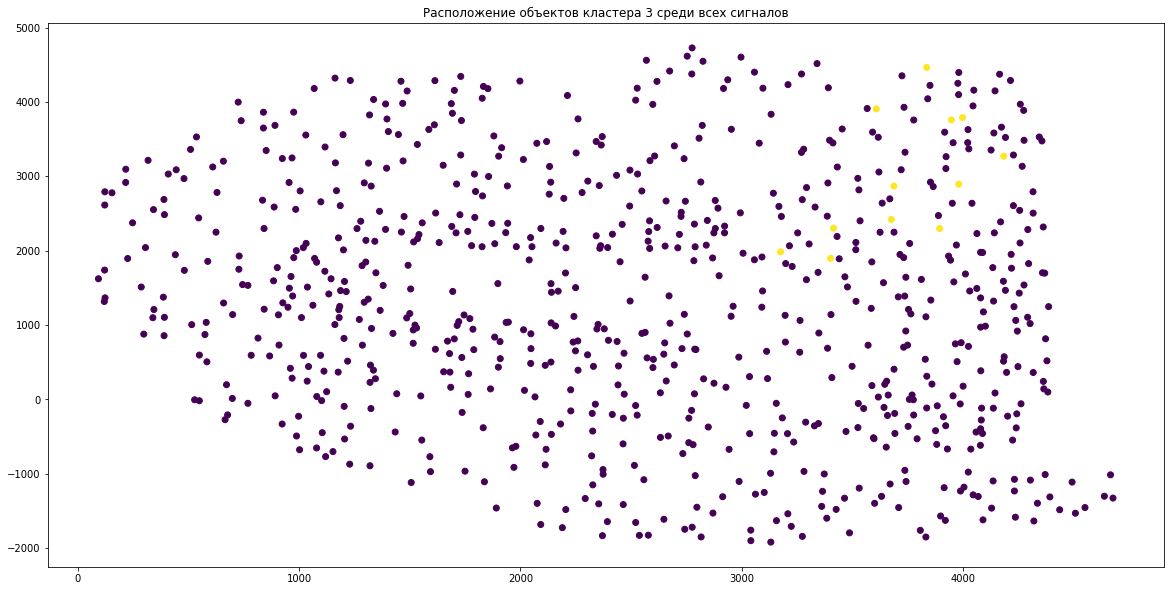

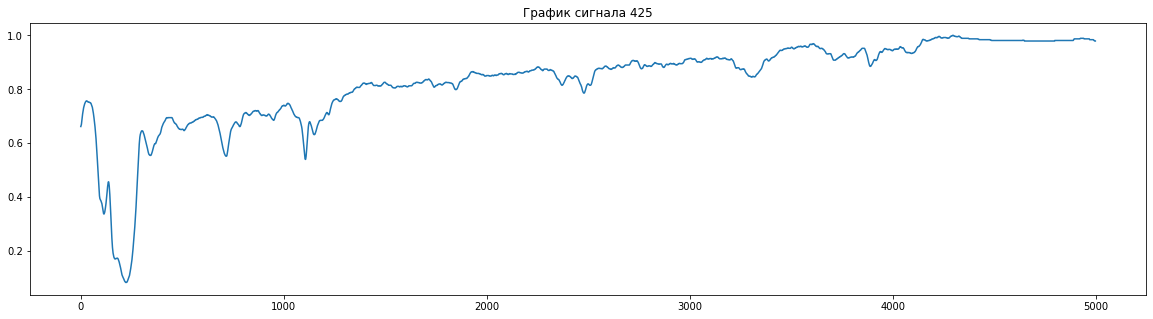

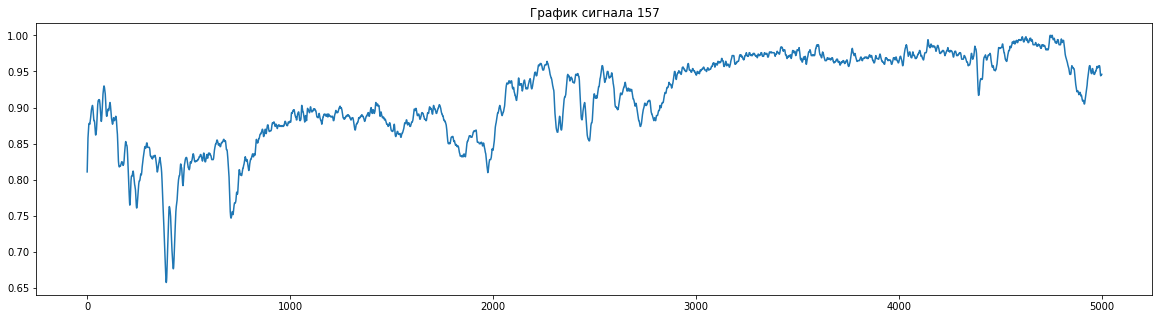

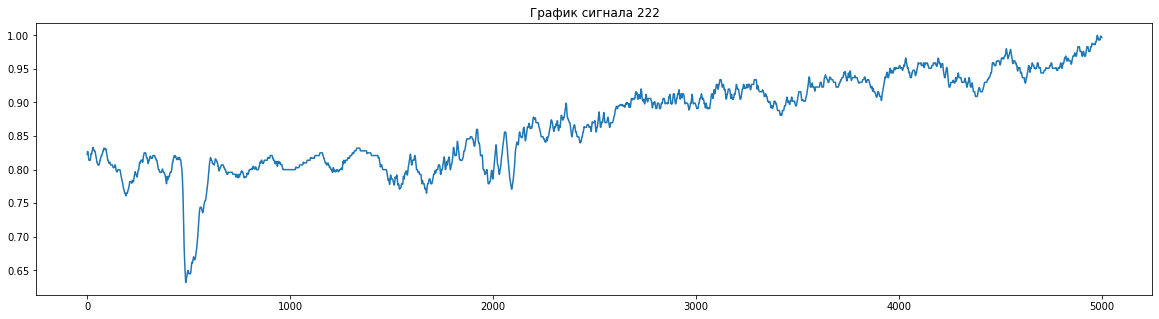

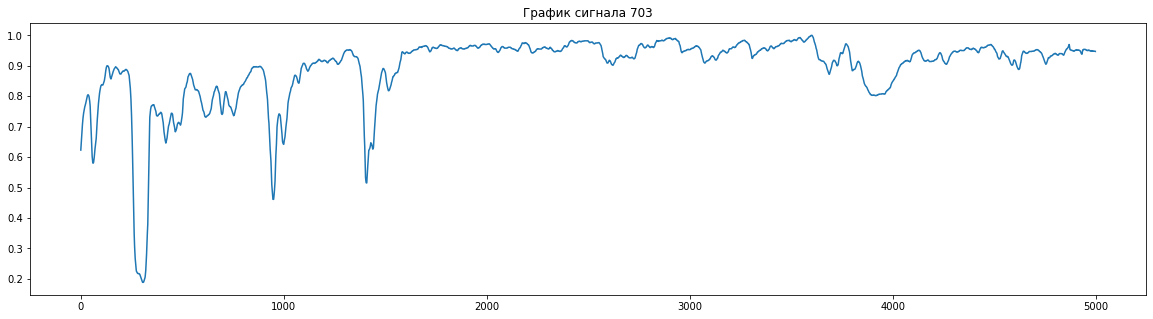

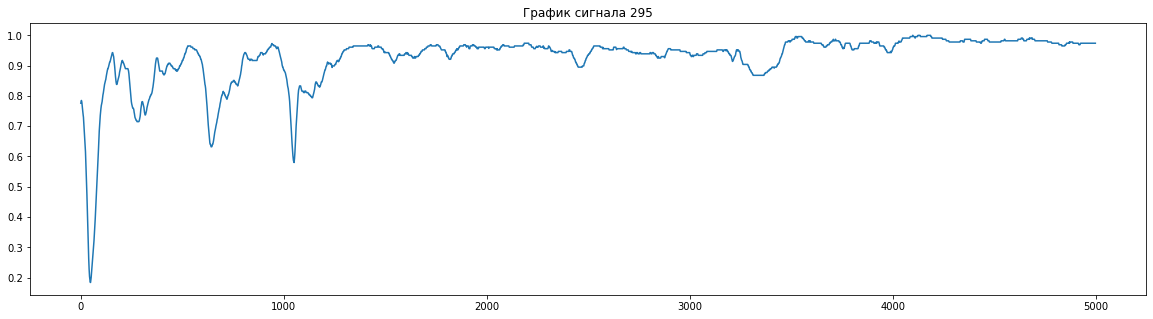

Обзор кластера 4


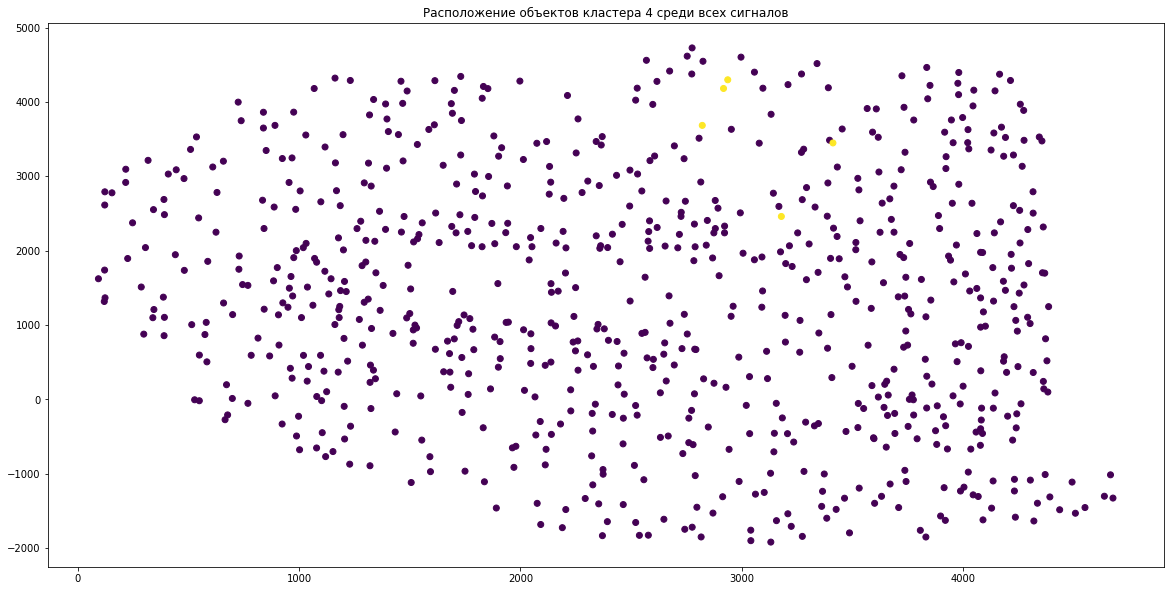

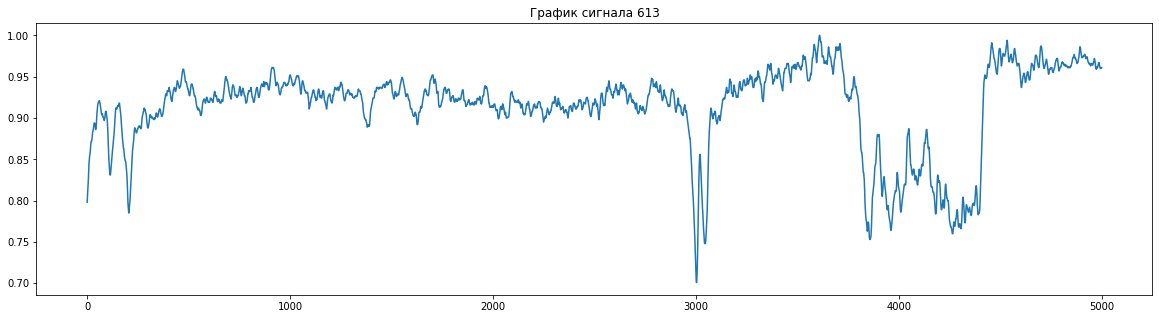

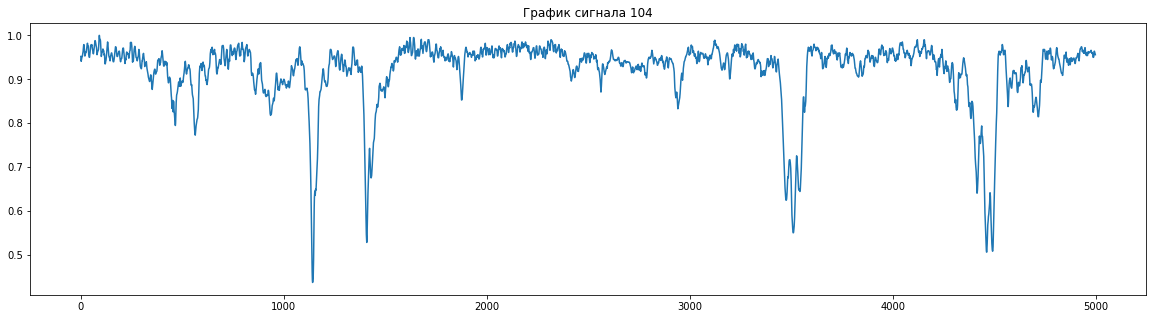

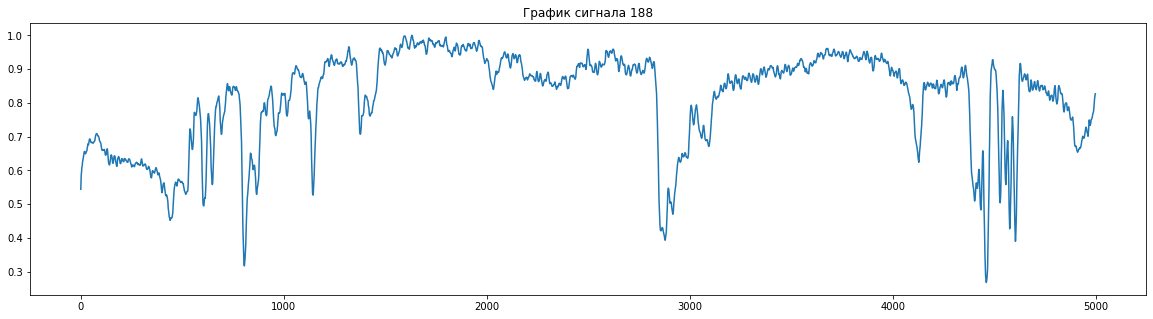

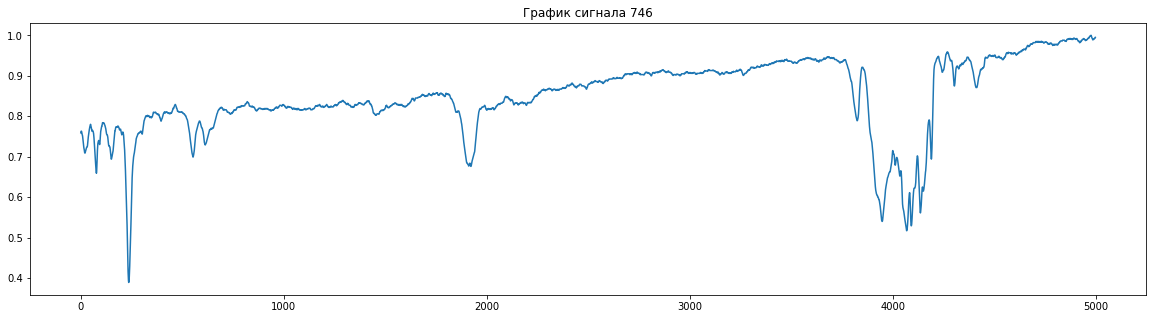

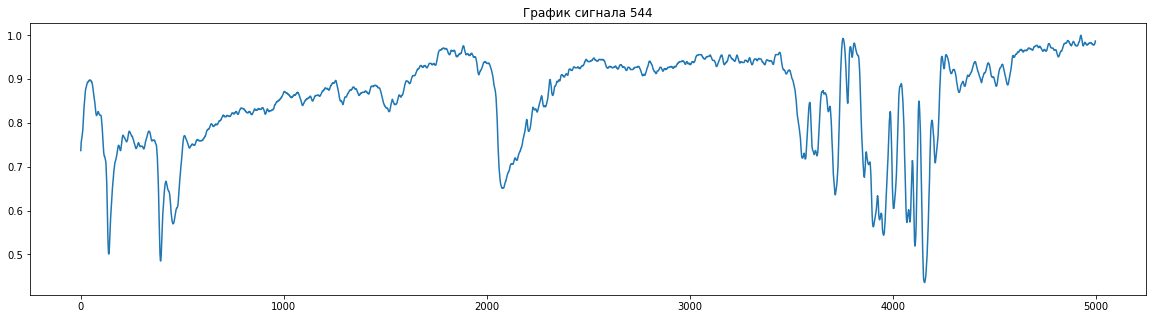

Обзор кластера 5


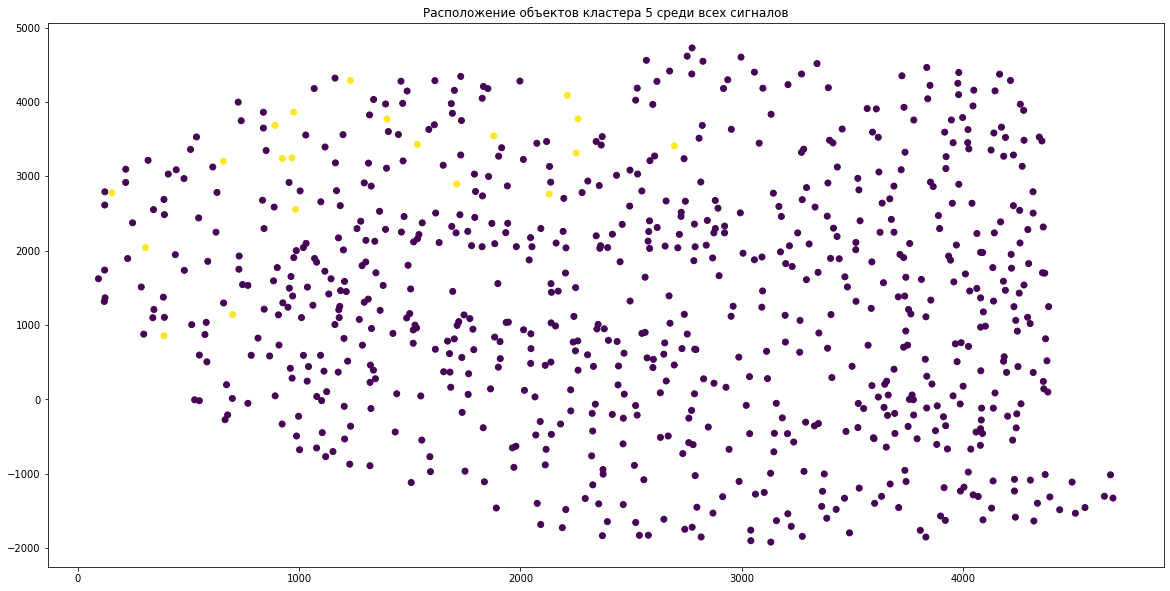

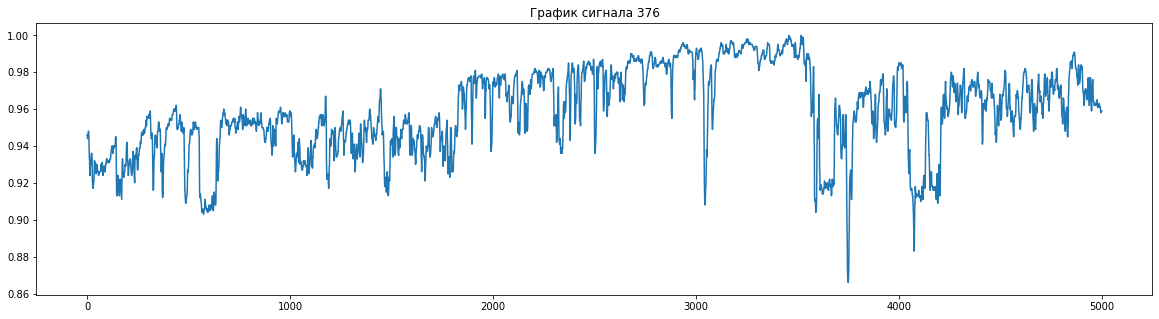

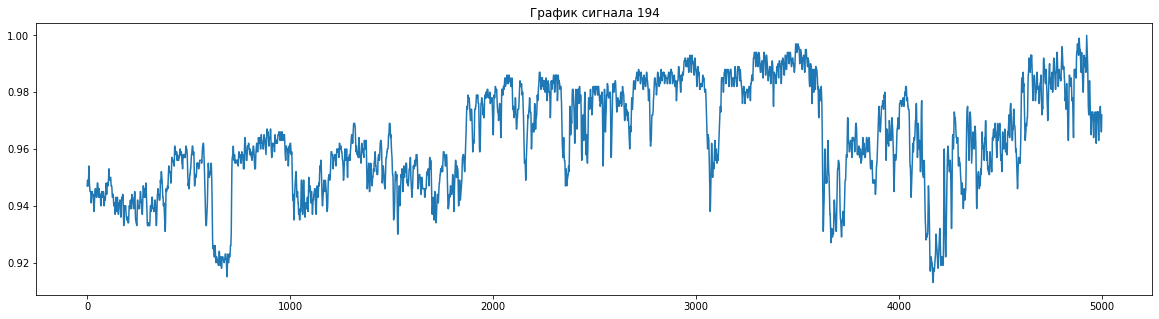

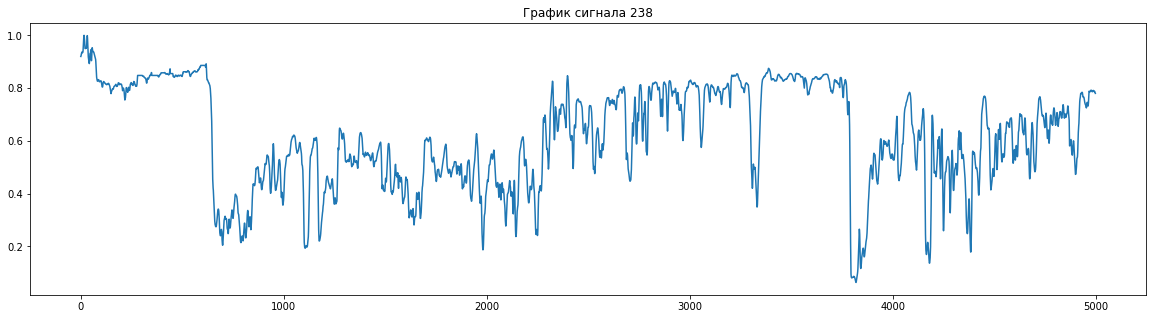

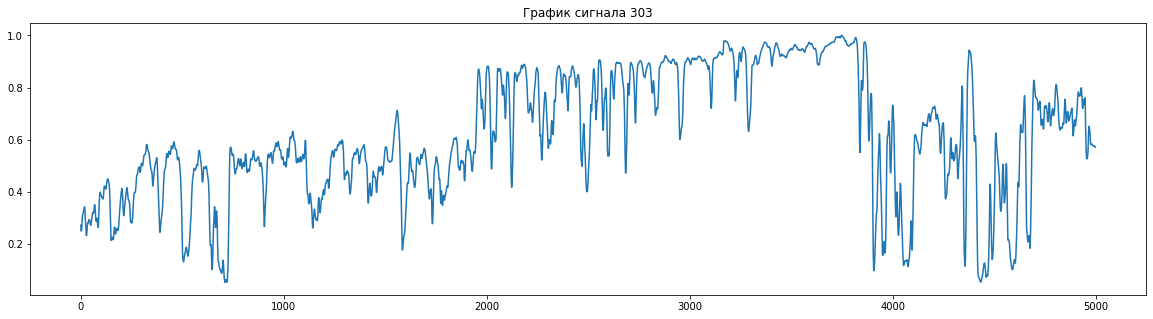

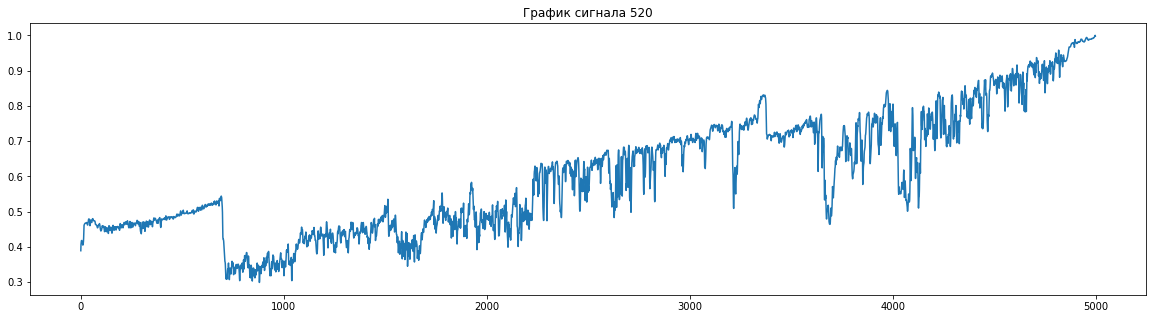

Обзор кластера 6


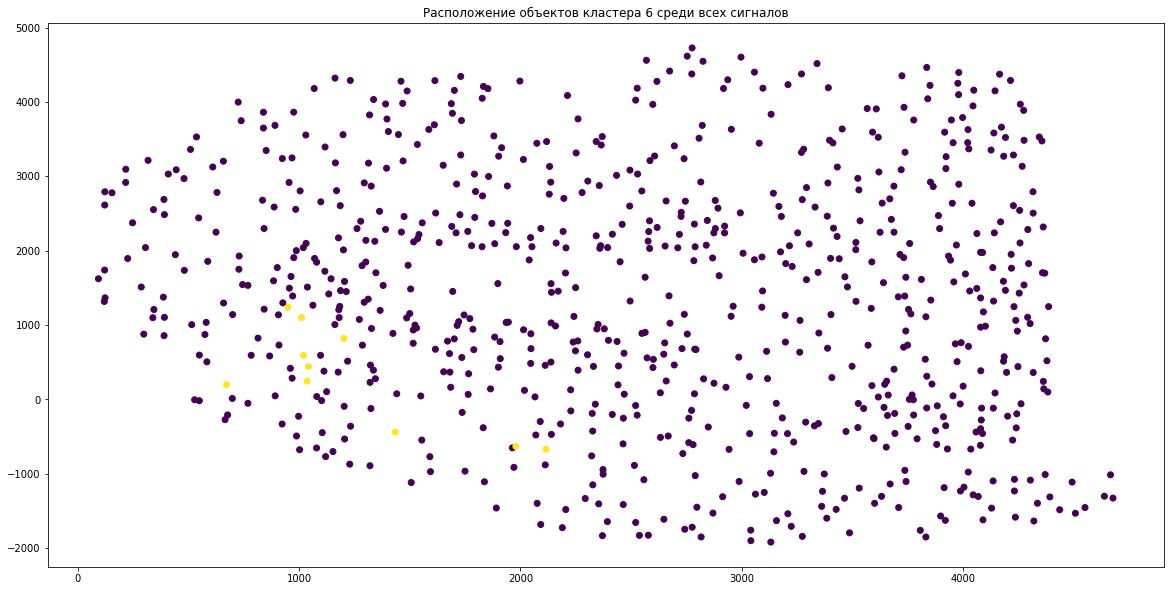

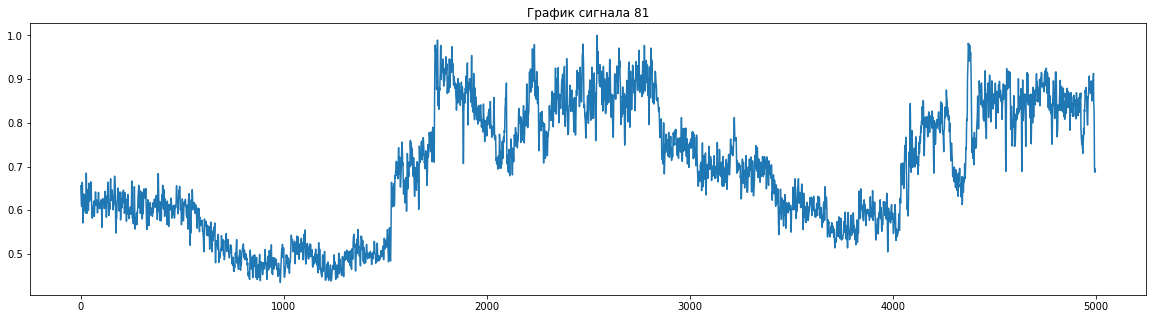

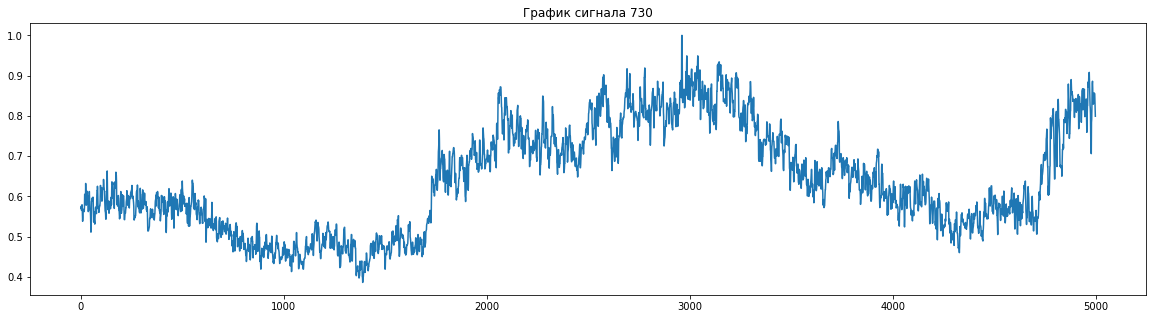

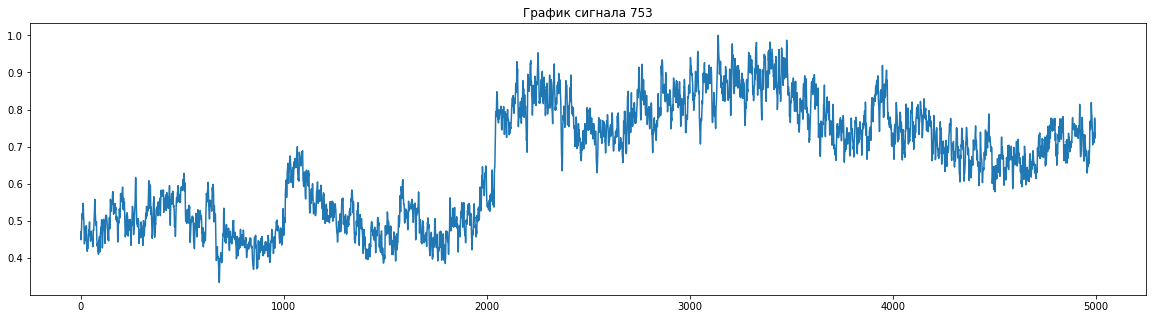

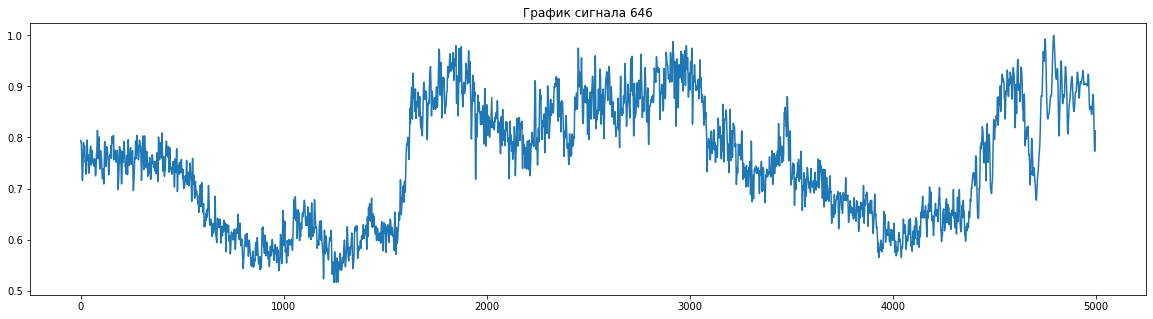

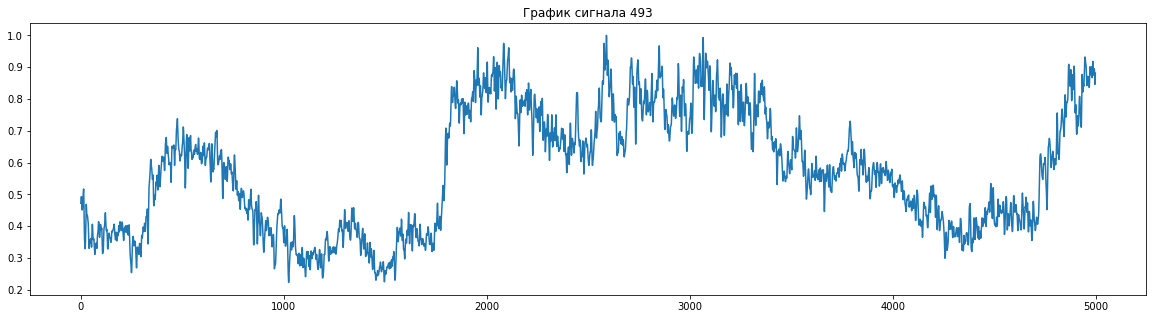

Обзор кластера 7


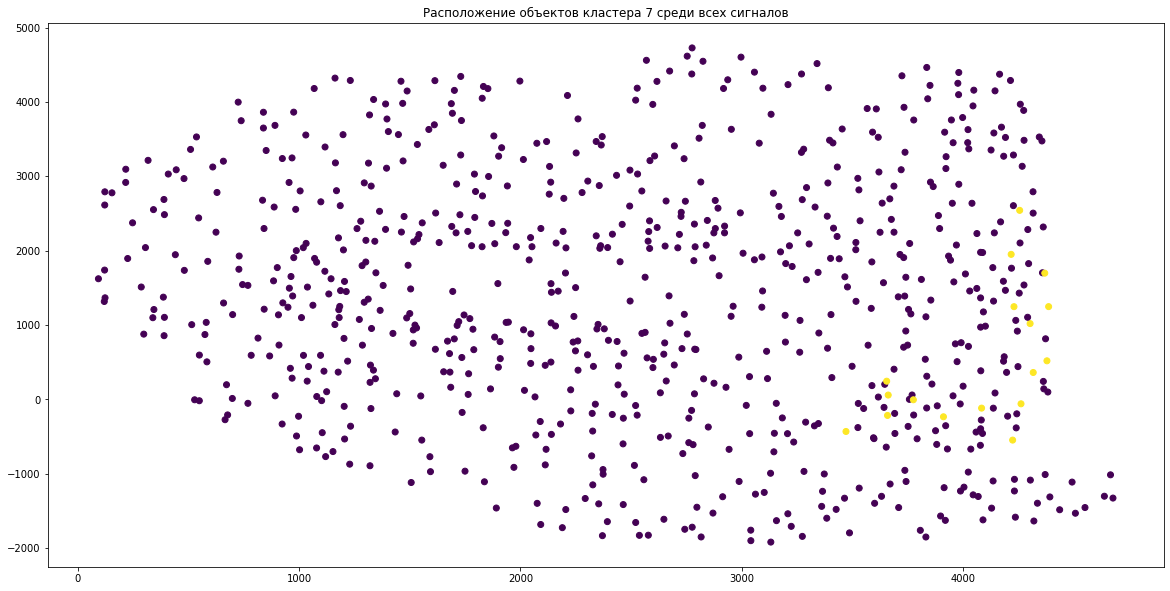

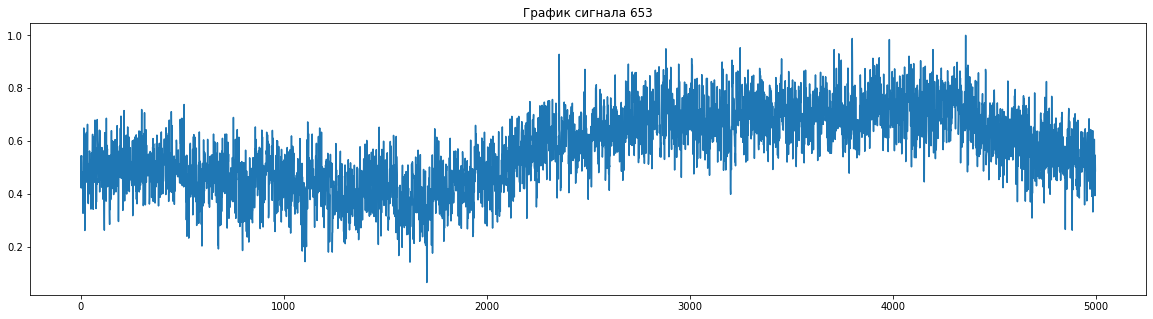

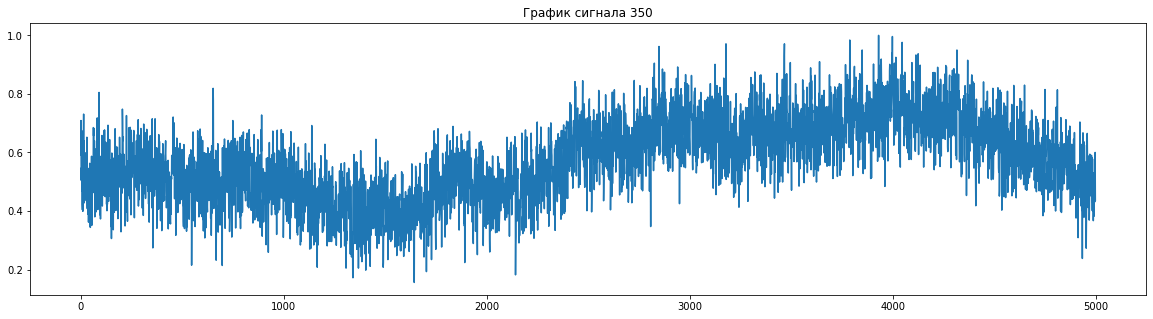

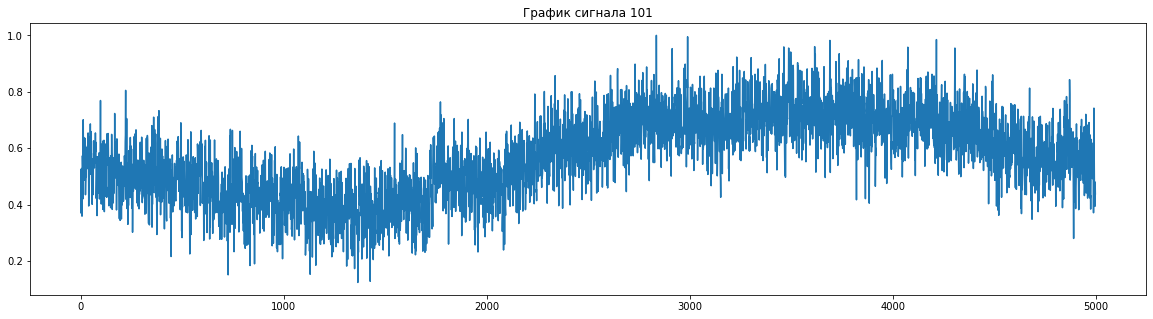

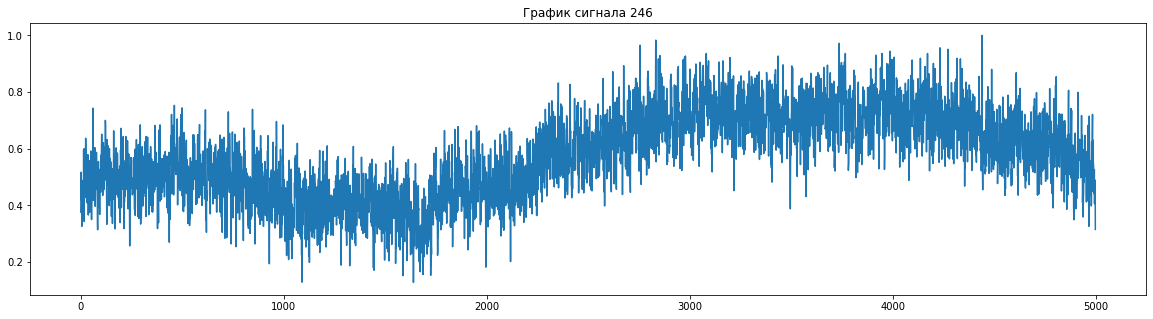

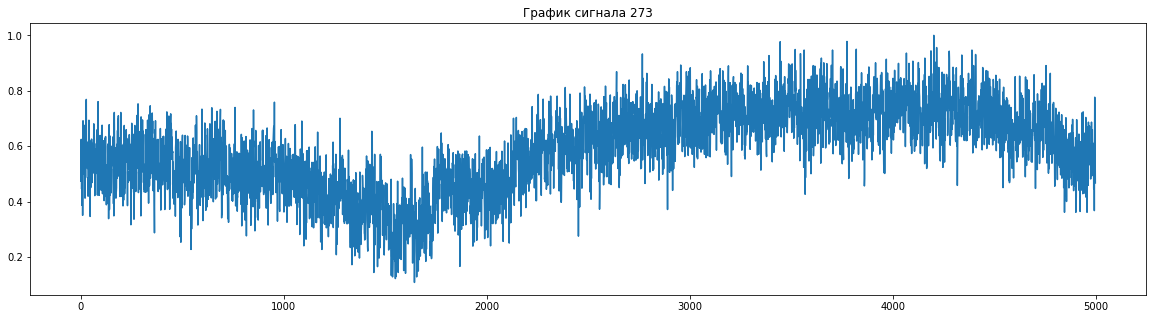

Обзор кластера 8


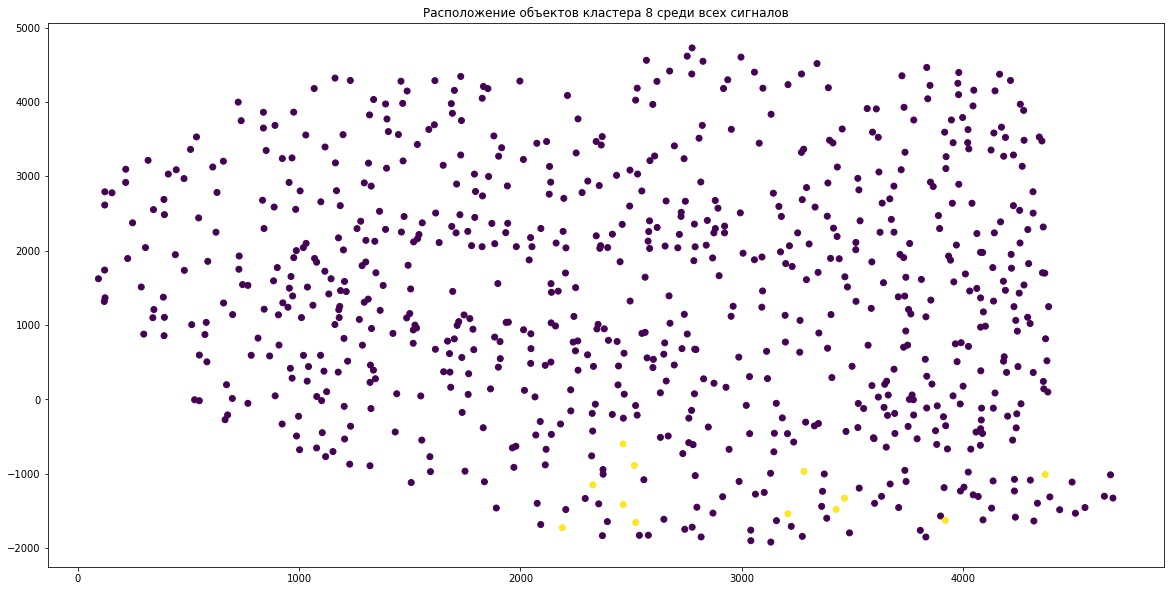

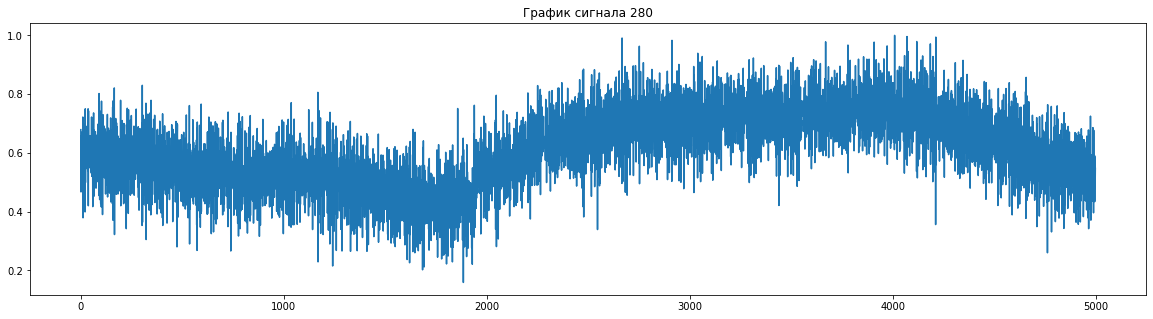

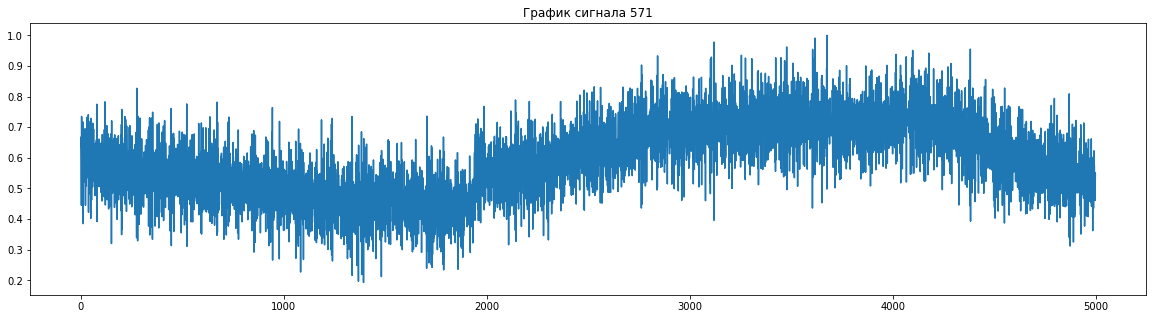

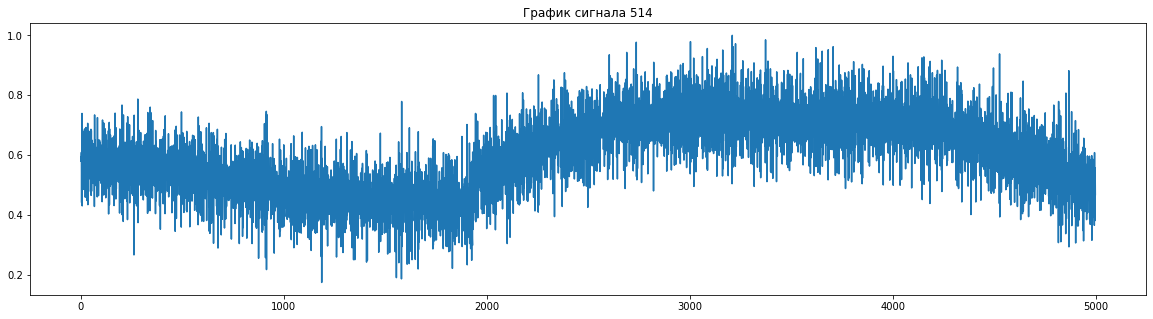

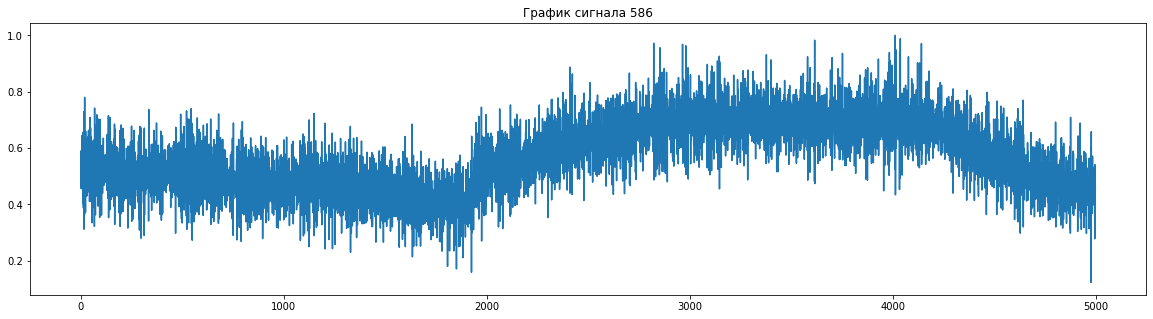

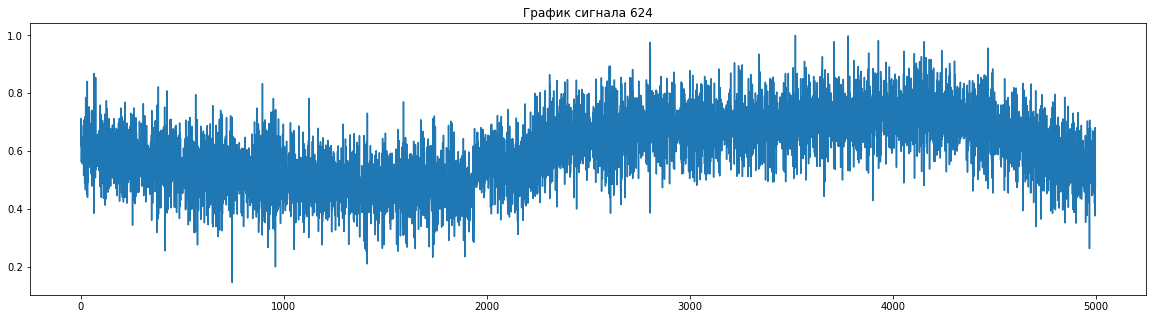

In [ ]:
x, y = data[['x']], data[['y']]
singal_columns = [f'v{j}' for j in range(0, 5000)]
train_df = data[data.cluster != -1]
fig, ax = plt.subplots(figsize=(20, 10))
plt.title(f'Расположение кластеров')
plt.scatter(train_df[['x']], train_df[['y']], c=train_df.cluster, cmap='Dark2')
plt.show()
for i in range(0, max(data.cluster)+1):
    print(f'Обзор кластера {i}')
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title(f'Расположение объектов кластера {i} среди всех сигналов')
    plt.scatter(x, y, c=(data.cluster == i))
    plt.show()
    random_signals = np.random.choice(data[data.cluster == i].index, size=5, replace=False)
    for name in random_signals:
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.plot(data.loc[name][singal_columns].values)
        plt.title(f'График сигнала {name}')
        plt.show()

In [ ]:
train_cluster = data[data['cluster']!=-1]
test_cluster = data[data['cluster']==-1]

In [ ]:
Y_train = train_cluster['cluster']
X_train = train_cluster.drop(columns=["cluster","p0","p1","p2","p3"])


In [ ]:
X_train_sign = train_cluster.drop(columns=["cluster","p0","p1","p2","p3", "x", "y"])
X_test_sign = test_cluster.drop(columns=["cluster","p0","p1","p2","p3", "x", "y"])

In [ ]:
Y_test = test_cluster['cluster']
X_test = test_cluster.drop(columns=["cluster","p0","p1","p2","p3"])

In [ ]:
X_clust_train = train_cluster.loc[:,['x','y']]
y_clust_train = train_cluster.loc[:,['cluster']]

X_clust_test = test_cluster.loc[:,['x','y']]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_clust_train = train_set.loc[]
rfc = RandomForestClassifier(max_depth='5')
rfc.fit(X_clust_train,y_clust_train)
labels = rfc.predict(X_clust_train)
rfc.score(X_clust_train,y_clust_train)

In [ ]:
test_labels = rfc.predict(X_clust_test)

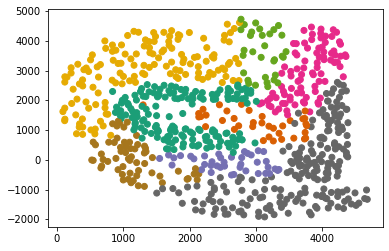

In [ ]:
plt.scatter(X_clust_train.append(X_clust_test)['x'],X_clust_train.append(X_clust_test)['y'] , c=np.append(y_clust_train,test_labels), cmap='Dark2')
plt.show()


In [ ]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train,Y_train)
labels = rfc2.predict(X_train)
rfc2.score(X_train,Y_train)

1.0

In [ ]:
rfc2.feature_importances_

array([0.01229656, 0.00738121, 0.        , ..., 0.00281179, 0.        ,
       0.00214017])

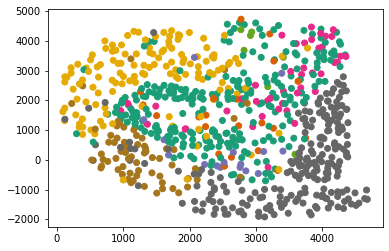

In [ ]:
plt.scatter(X_train.append(X_test)['x'],X_train.append(X_test)['y'] , c=np.append(Y_train,test_new_labels), cmap='Dark2')
plt.show()

In [ ]:
Y_train2 = train_set['cluster']
X_train2 = train_set.drop(columns=["cluster","p0","p1","p2","p3"])
rfc3 = RandomForestClassifier()
rfc3.fit(X_train2.drop(columns=[Y_train2])
X_test2 = test_set.drop(columns=["cluster","p0","p1","p2","p3"])
test3_labels = rfc3.predict(X_test2)
rfc3


SyntaxError: ignored

In [ ]:
rfc3.feature_importances_

array([0.00093112, 0.00070777, 0.00041142, ..., 0.        , 0.00058702,
       0.00458577])

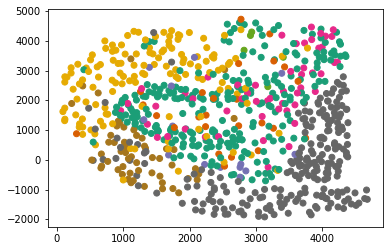

In [ ]:
plt.scatter(X_train2.append(X_test2)['x'],X_train2.append(X_test2)['y'] , c=np.append(Y_train2,test3_labels), cmap='Dark2')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#knn = KNeighborsClassifier(,weights='distance',metr)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
xgb_model = xgb.XGBClassifier(num_class=9)

In [ ]:
# фиксируем eta and n_estimators, подбираем коэффициенты регуляризации
params = {'n_estimators':[20],
          'eta':[0.01],
        'max_depth': np.arange(3,7,1),
        'min_child_weight': np.arange(1,10,1),
        'subsample': np.arange(0.5,1,0.05),
        'gamma': np.arange(0.5,1,0.01),
        'colsample_bytree': np.arange(0.4, 1, 0.05),
        'objective':['multi:softprob'],
          'eval_metric':['merror']
    }

In [ ]:
rand_search_xgb = RandomizedSearchCV(xgb_model, params, cv=5, n_iter=50)

In [ ]:
rand_search_xgb.fit(X_clust_train, y_clust_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected

In [ ]:
best_params = rand_search_xgb.best_params_
best_params

{'colsample_bytree': 0.45,
 'eta': 0.006,
 'eval_metric': 'merror',
 'gamma': 0.7500000000000002,
 'max_depth': 11,
 'min_child_weight': 2,
 'n_estimators': 20,
 'objective': 'multi:softprob',
 'subsample': 0.8000000000000003}

In [ ]:
# Подберем лучший learning rate and n_estimators
best_params.pop('eta')

In [ ]:
best_params['num_class'] = 9
best_params

{'colsample_bytree': 0.45,
 'eta': 0.006,
 'eval_metric': 'merror',
 'gamma': 0.7500000000000002,
 'max_depth': 11,
 'min_child_weight': 2,
 'n_estimators': 20,
 'num_class': 9,
 'objective': 'multi:softprob',
 'subsample': 0.8000000000000003}

In [ ]:
xgb_model2 = xgb.XGBClassifier(n_estimators=20,objective='multi:softprob',
                               subsample=0.8,
                               min_child_weight=2,
                              max_depth=6,
                               gamma=0.73,
                              eval_metric='merror',
                               colsample_bytree=0.4,
                               num_class=9)

In [ ]:
params2 = {
    'eta':np.arange(0.001, 0.1, 0.0005)
}

In [ ]:
grid_best_eta = GridSearchCV(xgb_model2, params2, cv=5)
grid_best_eta.fit(X_clust_train, y_clust_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.4, eval_metric='merror',
                                     gamma=0.73, max_depth=6,
                                     min_child_weight=2, n_estimators=20,
                                     num_class=9, objective='multi:softprob',
                                     subsample=0.8),
             param_grid={'eta': array([0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 , 0.0045,
       0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075, 0.008 , 0.0085,
       0.009 , 0.0095, 0.01  , 0.0105,...
       0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755, 0.076 , 0.0765,
       0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795, 0.08  , 0.0805,
       0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835, 0.084 , 0.0845,
       0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875, 0.088 , 0.0885,
       0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915, 0.092 , 0.0925,
       0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955, 0.096 ,

In [ ]:
grid_best_eta.best_params_

{'eta': 0.001}

In [ ]:
best_params.pop('n_estimators')

20

In [ ]:
best_params['eta'] = 0.001
best_params

{'colsample_bytree': 0.4,
 'eta': 0.001,
 'eval_metric': 'merror',
 'gamma': 0.7300000000000002,
 'max_depth': 6,
 'min_child_weight': 2,
 'num_class': 9,
 'objective': 'multi:softprob',
 'subsample': 0.8000000000000002}

In [ ]:
dtrain = xgb.DMatrix(X_clust_train, y_clust_train)

In [ ]:
xgbCVResult = xgb.cv(best_params, dtrain, num_boost_round=500, nfold=5, early_stopping_rounds=100)

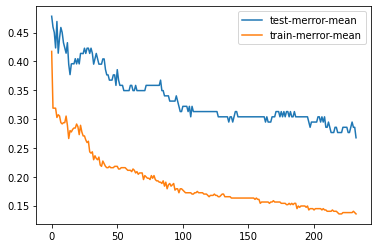

In [ ]:
plt.plot(range(xgbCVResult.shape[0]), xgbCVResult['test-merror-mean'], label='test-merror-mean')
plt.plot(range(xgbCVResult.shape[0]), xgbCVResult['train-merror-mean'], label='train-merror-mean')
plt.legend()

In [ ]:
best_num_round = np.argmin(xgbCVResult['test-merror-mean'])
best_num_round

232

In [ ]:
best_xgb = xgb.train(best_params, dtrain, num_boost_round=best_num_round)

In [ ]:
dtest = xgb.DMatrix(X_clust_test, y_clust_test)

In [ ]:
xgb_predict = best_xgb.predict(dtest)

In [ ]:
xgb_prediction = np.argmax(xgb_predict, axis=1)

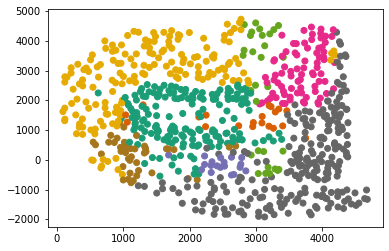

In [ ]:
plt.scatter(X_clust_train.append(X_clust_test)['x'],X_clust_train.append(X_clust_test)['y'] , c=np.append(y_clust_train, xgb_prediction), cmap='Dark2')
plt.show()


In [ ]:
## + 5000 feature

In [ ]:
rand_search_xgb.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(num_class=9), n_iter=50,
                   param_distributions={'colsample_bytree': array([0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ,
       0.95]),
                                        'eta': [0.01],
                                        'eval_metric': ['merror'],
                                        'gamma': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'max_depth': array([3, 4, 5, 6]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [20],
                                      

In [ ]:
best_params2 = rand_search_xgb.best_params_
best_params2

{'colsample_bytree': 0.8999999999999999,
 'eta': 0.01,
 'eval_metric': 'merror',
 'gamma': 0.7200000000000002,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 20,
 'objective': 'multi:softprob',
 'subsample': 0.8500000000000003}

In [ ]:
best_params2.pop('eta')
best_params2['num_class'] = 9
best_params2

{'colsample_bytree': 0.8999999999999999,
 'eval_metric': 'merror',
 'gamma': 0.7200000000000002,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 20,
 'num_class': 9,
 'objective': 'multi:softprob',
 'subsample': 0.8500000000000003}

In [ ]:
xgb_model3 = xgb.XGBClassifier(n_estimators=20,objective='multi:softprob',
                               subsample=0.85,
                               min_child_weight=1,
                              max_depth=5,
                               gamma=0.72,
                              eval_metric='merror',
                               colsample_bytree=0.9,
                               num_class=9)

In [ ]:
params3 = {
    'eta':np.arange(0.001, 0.1, 0.005)
}

In [ ]:
grid_best_eta2 = GridSearchCV(xgb_model3, params3, cv=5)
grid_best_eta2.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.9, eval_metric='merror',
                                     gamma=0.72, max_depth=5, n_estimators=20,
                                     num_class=9, objective='multi:softprob',
                                     subsample=0.85),
             param_grid={'eta': array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046, 0.051, 0.056, 0.061, 0.066, 0.071, 0.076, 0.081, 0.086,
       0.091, 0.096])})

In [ ]:
grid_best_eta2.best_params_

{'eta': 0.001}

In [ ]:
best_params2.pop('n_estimators')

20

In [ ]:
best_params2['eta'] = 0.01
best_params2

{'colsample_bytree': 0.8999999999999999,
 'eta': 0.01,
 'eval_metric': 'merror',
 'gamma': 0.7200000000000002,
 'max_depth': 5,
 'min_child_weight': 1,
 'num_class': 9,
 'objective': 'multi:softprob',
 'subsample': 0.8500000000000003}

In [ ]:
dtrain2 = xgb.DMatrix(X_train, Y_train)

In [ ]:
xgbCVResult2 = xgb.cv(best_params2, dtrain2, num_boost_round=500, nfold=5, early_stopping_rounds=50)

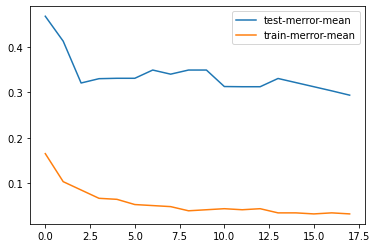

In [ ]:
plt.plot(range(xgbCVResult2.shape[0]), xgbCVResult2['test-merror-mean'], label='test-merror-mean')
plt.plot(range(xgbCVResult2.shape[0]), xgbCVResult2['train-merror-mean'], label='train-merror-mean')
plt.legend()

In [ ]:
best_num_round2 = np.argmin(xgbCVResult['test-merror-mean'])
best_num_round2

117

In [ ]:
best_xgb2 = xgb.train(best_params2, dtrain2, num_boost_round=best_num_round2)

In [ ]:
dtest2 = xgb.DMatrix(X_test, Y_test)

In [ ]:
xgb_predict2 = best_xgb2.predict(dtest2)

In [ ]:
xgb_prediction2 = np.argmax(xgb_predict2, axis=1)

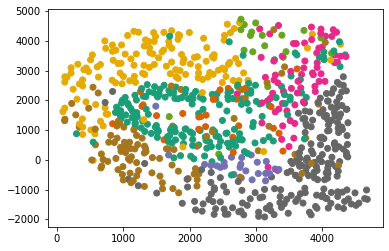

In [ ]:
plt.scatter(X_clust_train.append(X_clust_test)['x'],X_clust_train.append(X_clust_test)['y'] , c=np.append(Y_train, xgb_prediction2), cmap='Dark2')
plt.show()

In [ ]:
## without X, Y
rand_search_xgb.fit(X_train_sign, Y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(num_class=9), n_iter=50,
                   param_distributions={'colsample_bytree': array([0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ,
       0.95]),
                                        'eta': [0.01],
                                        'eval_metric': ['merror'],
                                        'gamma': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'max_depth': array([3, 4, 5, 6]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [20],
                                      

In [ ]:
best_params3 = rand_search_xgb.best_params_
best_params3

{'colsample_bytree': 0.7,
 'eta': 0.01,
 'eval_metric': 'merror',
 'gamma': 0.7300000000000002,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 20,
 'objective': 'multi:softprob',
 'subsample': 0.55}

In [ ]:
best_params3.pop('eta')
best_params3['num_class'] = 9
best_params3

{'colsample_bytree': 0.7,
 'eval_metric': 'merror',
 'gamma': 0.7300000000000002,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 20,
 'num_class': 9,
 'objective': 'multi:softprob',
 'subsample': 0.55}

In [ ]:
xgb_model4 = xgb.XGBClassifier(n_estimators=20,objective='multi:softprob',
                               subsample=0.55,
                               min_child_weight=1,
                              max_depth=6,
                               gamma=0.73,
                              eval_metric='merror',
                               colsample_bytree=0.7,
                               num_class=9)

In [ ]:
grid_best_eta3 = GridSearchCV(xgb_model4, params3, cv=5)
grid_best_eta3.fit(X_train_sign, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.7, eval_metric='merror',
                                     gamma=0.73, max_depth=6, n_estimators=20,
                                     num_class=9, objective='multi:softprob',
                                     subsample=0.55),
             param_grid={'eta': array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046, 0.051, 0.056, 0.061, 0.066, 0.071, 0.076, 0.081, 0.086,
       0.091, 0.096])})

In [ ]:
grid_best_eta3.best_params_

{'eta': 0.001}

In [ ]:
best_params3.pop('n_estimators')

20

In [ ]:
best_params3['eta'] = 0.001
best_params3

{'colsample_bytree': 0.7,
 'eta': 0.001,
 'eval_metric': 'merror',
 'gamma': 0.7300000000000002,
 'max_depth': 6,
 'min_child_weight': 1,
 'num_class': 9,
 'objective': 'multi:softprob',
 'subsample': 0.55}

In [ ]:
dtrain3 = xgb.DMatrix(X_train_sign, Y_train)

In [ ]:
xgbCVResult3 = xgb.cv(best_params3, dtrain3, num_boost_round=500, nfold=3, early_stopping_rounds=50)

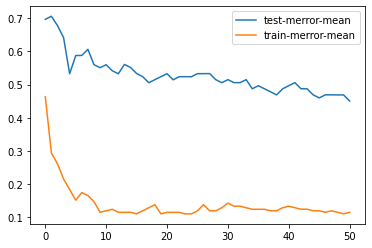

In [ ]:
plt.plot(range(xgbCVResult3.shape[0]), xgbCVResult3['test-merror-mean'], label='test-merror-mean')
plt.plot(range(xgbCVResult3.shape[0]), xgbCVResult3['train-merror-mean'], label='train-merror-mean')
plt.legend()

In [ ]:
best_num_round3 = np.argmin(xgbCVResult['test-merror-mean'])
best_num_round3

117

In [ ]:
best_xgb3 = xgb.train(best_params3, dtrain3, num_boost_round=best_num_round3)
dtest3 = xgb.DMatrix(X_test_sign, Y_test)

In [ ]:
xgb_predict3 = best_xgb3.predict(dtest3)

In [ ]:
xgb_prediction3 = np.argmax(xgb_predict3, axis=1)

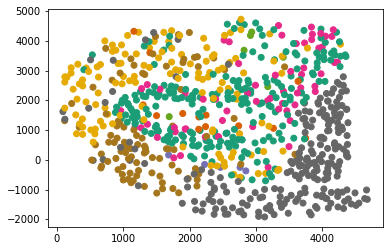

In [ ]:
plt.scatter(X_clust_train.append(X_clust_test)['x'],X_clust_train.append(X_clust_test)['y'] , c=np.append(Y_train, xgb_prediction3), cmap='Dark2')
plt.show()

In [ ]:
xgb_model_dif = xgb.XGBClassifier(num_class=9)

In [ ]:
dtrain_def = xgb.DMatrix(X_train_set, Y_train_set)

In [ ]:
params_def = {'colsample_bytree': 0.7,
              'eta': 0.001,
              'eval_metric': 'merror',
              'gamma': 0.7300000000000002,
              'max_depth': 6,
              'min_child_weight': 1,
              'num_class': 9,
              'objective': 'multi:softprob',
              'subsample': 0.55}

In [ ]:
xgbCVResult_def = xgb.cv(params_def, dtrain_def, num_boost_round=500, nfold=5, early_stopping_rounds=50)

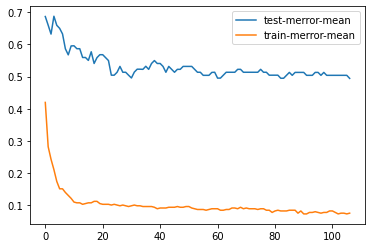

In [ ]:
plt.plot(range(xgbCVResult_def.shape[0]), xgbCVResult_def['test-merror-mean'], label='test-merror-mean')
plt.plot(range(xgbCVResult_def.shape[0]), xgbCVResult_def['train-merror-mean'], label='train-merror-mean')
plt.legend()

In [ ]:
best_num_round_def = np.argmin(xgbCVResult_def['test-merror-mean'])
best_num_round_def

106

In [ ]:
best_xgb_def = xgb.train(params_def, dtrain_def, num_boost_round=best_num_round_def)
dtest_def = xgb.DMatrix(X_test_set, Y_test_set)

In [ ]:
xgb_predict_def = best_xgb_def.predict(dtest_def)

In [ ]:
xgb_prediction_def = np.argmax(xgb_predict_def, axis=1)

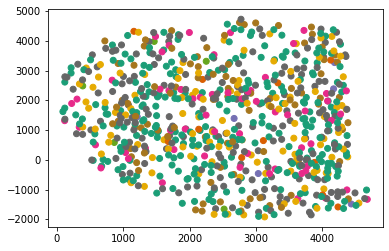

In [ ]:
plt.scatter(data['x'],data['y'] , c=np.append(Y_train_set, xgb_prediction_def), cmap='Dark2')
plt.show()

In [ ]:
df = pd.DataFrame({
    'name' : list(X_train_set.index.append(X_test_set.index)),
    'cluster' : list(np.append(Y_train_set,test3_labels))
})
df1 = df.set_index('name')
df1 = df1.sort_index()
df1

# Извлечение особых точек

In [ ]:
import tsfresh
from tqdm import tqdm
dataframes = []
train_df = df[df.cluster != -1]
for i in tqdm(train_df[train_df.cluster == 0].index.values):
    ar = [[i, j, df.loc[i]['v'+str(j)]] for j in range(0, 5000)]
    ts_df = pd.DataFrame(ar, columns=['name', 'time', 'value'])
    dataframes.append(ts_df)
ts_df = pd.concat(data)
extract_df = tsfresh.extract_features(ts_df, column_id='name', column_sort='time')

In [ ]:
#поиск особых точек
dots_train_p0 = data[data['p0']!=-1]
dots_train_p1 = data[data['p1']!=-1]
dots_train_p2 = data[data['p2']!=-1]
dots_train_p3 = data[data['p3']!=-1]

dots_test_p0 = data[data['p0']==-1]
dots_test_p1 = data[data['p1']==-1]
dots_test_p2 = data[data['p2']==-1]
dots_test_p3 = data[data['p3']==-1]

X_dots_train_p0 = dots_train_p0.loc[:,'v0':'v4999']
X_dots_train_p1 = dots_train_p1.loc[:,'v0':'v4999']
X_dots_train_p2 = dots_train_p2.loc[:,'v0':'v4999']
X_dots_train_p3 = dots_train_p3.loc[:,'v0':'v4999']

X_dots_test_p0 = dots_test_p0.loc[:,'v0':'v4999']
X_dots_test_p1 = dots_test_p1.loc[:,'v0':'v4999']
X_dots_test_p2 = dots_test_p2.loc[:,'v0':'v4999']
X_dots_test_p3 = dots_test_p3.loc[:,'v0':'v4999']

y_dots_train_p0 = dots_train_p0['p0']
y_dots_train_p1 = dots_train_p1['p1']
y_dots_train_p2 = dots_train_p2['p2']
y_dots_train_p3 = dots_train_p3['p3']

y_dots_test_p0 = dots_test_p0['p0']
y_dots_test_p1 = dots_test_p1['p1']
y_dots_test_p2 = dots_test_p2['p2']
y_dots_test_p3 = dots_test_p3['p3']

In [ ]:
from sklearn.linear_model import Ridge

ridreg0 = Ridge()
ridreg0.fit(X_dots_train_p0,y_dots_train_p0)
print(ridreg0.score(X_dots_train_p0,y_dots_train_p0))

ridreg1 = Ridge()
ridreg1.fit(X_dots_train_p1,y_dots_train_p1)
print(ridreg1.score(X_dots_train_p1,y_dots_train_p1))

ridreg2 = Ridge()
ridreg2.fit(X_dots_train_p2,y_dots_train_p2)
print(ridreg2.score(X_dots_train_p2,y_dots_train_p2))

ridreg3 = Ridge()
ridreg3.fit(X_dots_train_p3,y_dots_train_p3)
print(ridreg3.score(X_dots_train_p3,y_dots_train_p3))

0.9787613012498632
0.9995810835254262
0.9995046548566355
0.9995422947267806


In [ ]:
    random_signals_p0 = np.random.choice(dots_train_p0[dots_train_p0.cluster == 1].index,
                                         size=2, replace=False)

In [ ]:
random_signals_p0

array([  2, 609])

Обзор кластера 0


Обзор Первой характерной точки


IndexError: ignored

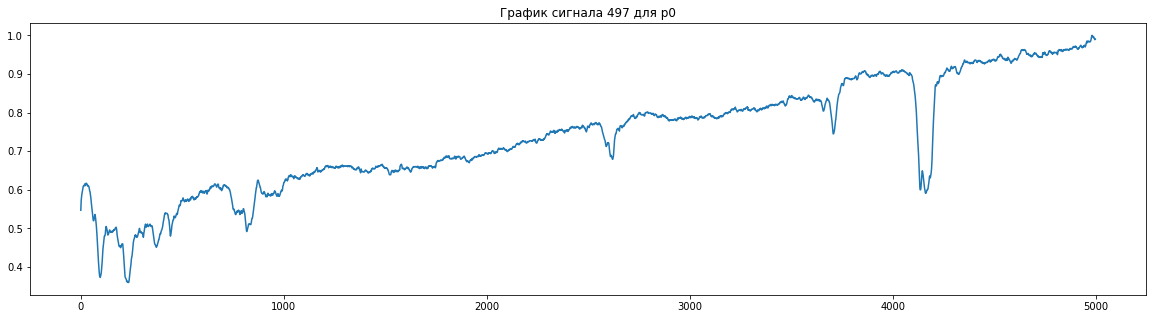

In [ ]:
for i in range(0, max(data.cluster)+1):
    print(f'Обзор кластера {i}')
    print('\n')

    random_signals_p0 = np.random.choice(dots_train_p0[dots_train_p0.cluster == i].index,
                                         size=2, replace=False)
    print("Обзор Первой характерной точки")
    for name in random_signals_p0:
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.plot(dots_train_p0.loc[name][singal_columns].values)
        plt.title(f'График сигнала {name} для p0')
        plt.vlines(random_signals_p0[name], 0, 1)
        plt.show()

    random_signals_p1 = np.random.choice(dots_train_p1[dots_train_p1.cluster == i].index,
                                         size=1, replace=False)
    print("Обзор Второй характерной точки")
    for name in random_signals_p1:
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.plot(dots_train_p1.loc[name][singal_columns].values)
        plt.title(f'График сигнала {name} для p1')
        plt.show()
    print("Обзор Третьей характерной точки")
    random_signals_p2 = np.random.choice(dots_train_p2[dots_train_p2.cluster == i].index,
                                         size=1, replace=False)
    for name in random_signals_p2:
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.plot(dots_train_p2.loc[name][singal_columns].values)
        plt.title(f'График сигнала {name} для p2')
        plt.show()
    print("Обзор Четвертой характерной точки")
    random_signals_p3 = np.random.choice(dots_train_p3[dots_train_p3.cluster == i].index,
                                         size=1, replace=False)
    for name in random_signals_p3:
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.plot(dots_train_p3.loc[name][singal_columns].values)
        plt.title(f'График сигнала {name} для p3')
        plt.show()


In [ ]:
Y_train2

name
730    6
673    8
520    5
609    1
419    7
      ..
70     3
665    5
471    1
505    5
273    7
Name: cluster, Length: 109, dtype: int64

In [ ]:
df = pd.DataFrame({
    'name' : list(X_train2.index.append(X_test2.index)),
    'cluster' : list(np.append(Y_train2,test3_labels))
})
df1 = df.set_index('name')
df1 = df1.sort_index()
df1

NameError: ignored

In [ ]:
data1 = data.join(df1, on='name',rsuffix=1)
data1 = data1.drop(['cluster'],axis=1)
data1

NameError: ignored

In [ ]:
url='https://drive.google.com/file/d/130ZyZSLSesruIDTWRXN_JedvJaRcUeMd/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data_result= read_signals(url)
data_result.head()

x            y     v0     v1     v2     v3     v4     v5  \
name                                                                       
168   3642.316895  -107.175003  0.558  0.595  0.519  0.742  0.664  0.467   
307   4034.298096  -668.197998  0.650  0.457  0.572  0.644  0.581  0.525   
668   4358.000977  1703.198975  0.638  0.621  0.646  0.495  0.510  0.611   
229   2786.060059    75.125000  0.917  0.917  0.916  0.912  0.908  0.905   
316    988.637024  -492.056000  0.359  0.364  0.379  0.396  0.404  0.405   

         v6     v7  ...  v4995  v4996  v4997  v4998  v4999  cluster  p0  p1  \
name                ...                                                       
168   0.426  0.448  ...  0.606  0.523  0.607  0.629  0.664        7  -1  -1   
307   0.645  0.515  ...  0.397  0.579  0.636  0.570  0.530        7  -1  -1   
668   0.574  0.601  ...  0.569  0.587  0.541  0.412  0.519        8  -1  -1   
229   0.904  0.904  ...  0.943  0.943  0.943  0.943  0.943        0  -1  -1   
316   0.392  0.371  ...  0.626  0.606  0.629  0.674  0.727        6  -1  -1   

      p2  p3  
name          
168   -1  -1  
307   -1  -1  
668   -1  -1  
229   -1  -1  
316   -1  -1  

[5 rows x 5007 columns]

In [ ]:
i = 0
for i in range(0, 5000-1, 1): 
    data_result["v"+str(10000+i)] = data_result['v'+str(i)] - data_result['v'+str(i+1)]
for i in range(0, 5000-4, 1): 
    data_result["v"+str(30000+i)] = data_result['v'+str(i)] - data_result['v'+str(i+3)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dots_train_p0 = data_result[data_result['p0']!=-1]
dots_train_p1 = data_result[data_result['p1']!=-1]
dots_train_p2 = data_result[data_result['p2']!=-1]
dots_train_p3 = data_result[data_result['p3']!=-1]

dots_test_p0 = data_result[data_result['p0']==-1]
dots_test_p1 = data_result[data_result['p1']==-1]
dots_test_p2 = data_result[data_result['p2']==-1]
dots_test_p3 = data_result[data_result['p3']==-1]


X_train_cl0p0 = dots_train_p0[dots_train_p0["cluster"]==0]
X_train_cl1p0 = dots_train_p0[dots_train_p0["cluster"]==1]
X_train_cl2p0 = dots_train_p0[dots_train_p0["cluster"]==2]
X_train_cl3p0 = dots_train_p0[dots_train_p0["cluster"]==3]
X_train_cl4p0 = dots_train_p0[dots_train_p0["cluster"]==4]
X_train_cl5p0 = dots_train_p0[dots_train_p0["cluster"]==5]
X_train_cl6p0 = dots_train_p0[dots_train_p0["cluster"]==6]
X_train_cl7p0 = dots_train_p0[dots_train_p0["cluster"]==7]
X_train_cl8p0 = dots_train_p0[dots_train_p0["cluster"]==8]

X_train_cl0p1 = dots_train_p1[dots_train_p1["cluster"]==0]
X_train_cl1p1 = dots_train_p1[dots_train_p1["cluster"]==1]
X_train_cl2p1 = dots_train_p1[dots_train_p1["cluster"]==2]
X_train_cl3p1 = dots_train_p1[dots_train_p1["cluster"]==3]
X_train_cl4p1 = dots_train_p1[dots_train_p1["cluster"]==4]
X_train_cl5p1 = dots_train_p1[dots_train_p1["cluster"]==5]
X_train_cl6p1 = dots_train_p1[dots_train_p1["cluster"]==6]
X_train_cl7p1 = dots_train_p1[dots_train_p1["cluster"]==7]
X_train_cl8p1 = dots_train_p1[dots_train_p1["cluster"]==8]

X_train_cl0p2 = dots_train_p2[dots_train_p2["cluster"]==0]
X_train_cl1p2 = dots_train_p2[dots_train_p2["cluster"]==1]
X_train_cl2p2 = dots_train_p2[dots_train_p2["cluster"]==2]
X_train_cl3p2 = dots_train_p2[dots_train_p2["cluster"]==3]
X_train_cl4p2 = dots_train_p2[dots_train_p2["cluster"]==4]
X_train_cl5p2 = dots_train_p2[dots_train_p2["cluster"]==5]
X_train_cl6p2 = dots_train_p2[dots_train_p2["cluster"]==6]
X_train_cl7p2 = dots_train_p2[dots_train_p2["cluster"]==7]
X_train_cl8p2 = dots_train_p2[dots_train_p2["cluster"]==8]

X_train_cl0p3 = dots_train_p3[dots_train_p3["cluster"]==0]
X_train_cl1p3 = dots_train_p3[dots_train_p3["cluster"]==1]
X_train_cl2p3 = dots_train_p3[dots_train_p3["cluster"]==2]
X_train_cl3p3 = dots_train_p3[dots_train_p3["cluster"]==3]
X_train_cl4p3 = dots_train_p3[dots_train_p3["cluster"]==4]
X_train_cl5p3 = dots_train_p3[dots_train_p3["cluster"]==5]
X_train_cl6p3 = dots_train_p3[dots_train_p3["cluster"]==6]
X_train_cl7p3 = dots_train_p3[dots_train_p3["cluster"]==7]
X_train_cl8p3 = dots_train_p3[dots_train_p3["cluster"]==8]

y_train_p0cl0 = dots_train_p0[dots_train_p0["cluster"]==0]['p0']
y_train_p0cl1 = dots_train_p0[dots_train_p0["cluster"]==1]['p0']
y_train_p0cl2 = dots_train_p0[dots_train_p0["cluster"]==2]['p0']
y_train_p0cl3 = dots_train_p0[dots_train_p0["cluster"]==3]['p0']
y_train_p0cl4 = dots_train_p0[dots_train_p0["cluster"]==4]['p0']
y_train_p0cl5 = dots_train_p0[dots_train_p0["cluster"]==5]['p0']
y_train_p0cl6 = dots_train_p0[dots_train_p0["cluster"]==6]['p0']
y_train_p0cl7 = dots_train_p0[dots_train_p0["cluster"]==7]['p0']
y_train_p0cl8 = dots_train_p0[dots_train_p0["cluster"]==8]['p0']

y_train_p1cl0 = dots_train_p1[dots_train_p1["cluster"]==0]['p1']
y_train_p1cl1 = dots_train_p1[dots_train_p1["cluster"]==1]['p1']
y_train_p1cl2 = dots_train_p1[dots_train_p1["cluster"]==2]['p1']
y_train_p1cl3 = dots_train_p1[dots_train_p1["cluster"]==3]['p1']
y_train_p1cl4 = dots_train_p1[dots_train_p1["cluster"]==4]['p1']
y_train_p1cl5 = dots_train_p1[dots_train_p1["cluster"]==5]['p1']
y_train_p1cl6 = dots_train_p1[dots_train_p1["cluster"]==6]['p1']
y_train_p1cl7 = dots_train_p1[dots_train_p1["cluster"]==7]['p1']
y_train_p1cl8 = dots_train_p1[dots_train_p1["cluster"]==8]['p1']

y_train_p2cl0 = dots_train_p2[dots_train_p2["cluster"]==0]['p2']
y_train_p2cl1 = dots_train_p2[dots_train_p2["cluster"]==1]['p2']
y_train_p2cl2 = dots_train_p2[dots_train_p2["cluster"]==2]['p2']
y_train_p2cl3 = dots_train_p2[dots_train_p2["cluster"]==3]['p2']
y_train_p2cl4 = dots_train_p2[dots_train_p2["cluster"]==4]['p2']
y_train_p2cl5 = dots_train_p2[dots_train_p2["cluster"]==5]['p2']
y_train_p2cl6 = dots_train_p2[dots_train_p2["cluster"]==6]['p2']
y_train_p2cl7 = dots_train_p2[dots_train_p2["cluster"]==7]['p2']
y_train_p2cl8 = dots_train_p2[dots_train_p2["cluster"]==8]['p2']

y_train_p3cl0 = dots_train_p3[dots_train_p3["cluster"]==0]['p3']
y_train_p3cl1 = dots_train_p3[dots_train_p3["cluster"]==1]['p3']
y_train_p3cl2 = dots_train_p3[dots_train_p3["cluster"]==2]['p3']
y_train_p3cl3 = dots_train_p3[dots_train_p3["cluster"]==3]['p3']
y_train_p3cl4 = dots_train_p3[dots_train_p3["cluster"]==4]['p3']
y_train_p3cl5 = dots_train_p3[dots_train_p3["cluster"]==5]['p3']
y_train_p3cl6 = dots_train_p3[dots_train_p3["cluster"]==6]['p3']
y_train_p3cl7 = dots_train_p3[dots_train_p3["cluster"]==7]['p3']
y_train_p3cl8 = dots_train_p3[dots_train_p3["cluster"]==8]['p3']


X_test_p0cl0 = dots_test_p0[dots_test_p0['cluster']==0].loc[:,'v0':'v4999']
X_test_p0cl1 = dots_test_p0[dots_test_p0['cluster']==1].loc[:,'v0':'v4999']
X_test_p0cl2 = dots_test_p0[dots_test_p0['cluster']==2].loc[:,'v0':'v4999']
X_test_p0cl3 = dots_test_p0[dots_test_p0['cluster']==3].loc[:,'v0':'v4999']
X_test_p0cl4 = dots_test_p0[dots_test_p0['cluster']==4].loc[:,'v0':'v4999']
X_test_p0cl5 = dots_test_p0[dots_test_p0['cluster']==5].loc[:,'v0':'v4999']
X_test_p0cl6 = dots_test_p0[dots_test_p0['cluster']==6].loc[:,'v0':'v4999']
X_test_p0cl7 = dots_test_p0[dots_test_p0['cluster']==7].loc[:,'v0':'v4999']
X_test_p0cl8 = dots_test_p0[dots_test_p0['cluster']==8].loc[:,'v0':'v4999']

X_test_p1cl0 = dots_test_p1[dots_test_p1['cluster']==0].loc[:,'v0':'v4999']
X_test_p1cl1 = dots_test_p1[dots_test_p1['cluster']==1].loc[:,'v0':'v4999']
X_test_p1cl2 = dots_test_p1[dots_test_p1['cluster']==2].loc[:,'v0':'v4999']
X_test_p1cl3 = dots_test_p1[dots_test_p1['cluster']==3].loc[:,'v0':'v4999']
X_test_p1cl4 = dots_test_p1[dots_test_p1['cluster']==4].loc[:,'v0':'v4999']
X_test_p1cl5 = dots_test_p1[dots_test_p1['cluster']==5].loc[:,'v0':'v4999']
X_test_p1cl6 = dots_test_p1[dots_test_p1['cluster']==6].loc[:,'v0':'v4999']
X_test_p1cl7 = dots_test_p1[dots_test_p1['cluster']==7].loc[:,'v0':'v4999']
X_test_p1cl8 = dots_test_p1[dots_test_p1['cluster']==8].loc[:,'v0':'v4999']

X_test_p2cl0 = dots_test_p2[dots_test_p2['cluster']==0].loc[:,'v0':'v4999']
X_test_p2cl1 = dots_test_p2[dots_test_p2['cluster']==1].loc[:,'v0':'v4999']
X_test_p2cl2 = dots_test_p2[dots_test_p2['cluster']==2].loc[:,'v0':'v4999']
X_test_p2cl3 = dots_test_p2[dots_test_p2['cluster']==3].loc[:,'v0':'v4999']
X_test_p2cl4 = dots_test_p2[dots_test_p2['cluster']==4].loc[:,'v0':'v4999']
X_test_p2cl5 = dots_test_p2[dots_test_p2['cluster']==5].loc[:,'v0':'v4999']
X_test_p2cl6 = dots_test_p2[dots_test_p2['cluster']==6].loc[:,'v0':'v4999']
X_test_p2cl7 = dots_test_p2[dots_test_p2['cluster']==7].loc[:,'v0':'v4999']
X_test_p2cl8 = dots_test_p2[dots_test_p2['cluster']==8].loc[:,'v0':'v4999']

X_test_p3cl0 = dots_test_p3[dots_test_p3['cluster']==0].loc[:,'v0':'v4999']
X_test_p3cl1 = dots_test_p3[dots_test_p3['cluster']==1].loc[:,'v0':'v4999']
X_test_p3cl2 = dots_test_p3[dots_test_p3['cluster']==2].loc[:,'v0':'v4999']
X_test_p3cl3 = dots_test_p3[dots_test_p3['cluster']==3].loc[:,'v0':'v4999']
X_test_p3cl4 = dots_test_p3[dots_test_p3['cluster']==4].loc[:,'v0':'v4999']
X_test_p3cl5 = dots_test_p3[dots_test_p3['cluster']==5].loc[:,'v0':'v4999']
X_test_p3cl6 = dots_test_p3[dots_test_p3['cluster']==6].loc[:,'v0':'v4999']
X_test_p3cl7 = dots_test_p3[dots_test_p3['cluster']==7].loc[:,'v0':'v4999']
X_test_p3cl8 = dots_test_p3[dots_test_p3['cluster']==8].loc[:,'v0':'v4999']

NameError: ignored

In [ ]:
#separate_data(data1)

In [ ]:
ridregp0cl0 = Ridge()
ridregp0cl0.fit(X_train_cl0p0,y_train_p0cl0)

ridregp0cl1 = Ridge()
ridregp0cl1.fit(X_train_cl1p0,y_train_p0cl1)

ridregp0cl2 = Ridge()
ridregp0cl2.fit(X_train_cl2p0,y_train_p0cl2)

ridregp0cl3 = Ridge()
ridregp0cl3.fit(X_train_cl3p0,y_train_p0cl3)

ridregp0cl4 = Ridge()
ridregp0cl4.fit(X_train_cl4p0,y_train_p0cl4)

ridregp0cl5 = Ridge()
ridregp0cl5.fit(X_train_cl5p0,y_train_p0cl5)

ridregp0cl6 = Ridge()
ridregp0cl6.fit(X_train_cl6p0,y_train_p0cl6)

ridregp0cl7 = Ridge()
ridregp0cl7.fit(X_train_cl7p0,y_train_p0cl7)

ridregp0cl8 = Ridge()
ridregp0cl8.fit(X_train_cl8p0,y_train_p0cl8)

ValueError: ignored

In [ ]:
ridregp1cl0 = Ridge()
ridregp1cl0.fit(X_train_cl0p1,y_train_p1cl0)

ridregp1cl1 = Ridge()
ridregp1cl1.fit(X_train_cl1p1,y_train_p1cl1)

ridregp1cl2 = Ridge()
ridregp1cl2.fit(X_train_cl2p1,y_train_p1cl2)

ridregp1cl3 = Ridge()
ridregp1cl3.fit(X_train_cl3p1,y_train_p1cl3)

ridregp1cl4 = Ridge()
ridregp1cl4.fit(X_train_cl4p1,y_train_p1cl4)

ridregp1cl5 = Ridge()
ridregp1cl5.fit(X_train_cl5p1,y_train_p1cl5)

ridregp1cl6 = Ridge()
ridregp1cl6.fit(X_train_cl6p1,y_train_p1cl6)

ridregp1cl7 = Ridge()
ridregp1cl7.fit(X_train_cl7p1,y_train_p1cl7)

ridregp1cl8 = Ridge()
ridregp1cl8.fit(X_train_cl8p1,y_train_p1cl8)

Ridge()

In [ ]:
ridregp2cl0 = Ridge()
ridregp2cl0.fit(X_train_cl0p2,y_train_p2cl0)

ridregp2cl1 = Ridge()
ridregp2cl1.fit(X_train_cl1p2,y_train_p2cl1)

ridregp2cl2 = Ridge()
ridregp2cl2.fit(X_train_cl2p2,y_train_p2cl2)

ridregp2cl3 = Ridge()
ridregp2cl3.fit(X_train_cl3p2,y_train_p2cl3)

ridregp2cl4 = Ridge()
ridregp2cl4.fit(X_train_cl4p2,y_train_p2cl4)

ridregp2cl5 = Ridge()
ridregp2cl5.fit(X_train_cl5p2,y_train_p2cl5)

ridregp2cl6 = Ridge()
ridregp2cl6.fit(X_train_cl6p2,y_train_p2cl6)

ridregp2cl7 = Ridge()
ridregp2cl7.fit(X_train_cl7p2,y_train_p2cl7)

ridregp2cl8 = Ridge()
ridregp2cl8.fit(X_train_cl8p2,y_train_p2cl8)

Ridge()

In [ ]:
ridregp3cl0 = Ridge()
ridregp3cl0.fit(X_train_cl0p3,y_train_p3cl0)

ridregp3cl1 = Ridge()
ridregp3cl1.fit(X_train_cl1p3,y_train_p3cl1)

ridregp3cl2 = Ridge()
ridregp3cl2.fit(X_train_cl2p3,y_train_p3cl2)

ridregp3cl3 = Ridge()
ridregp3cl3.fit(X_train_cl3p3,y_train_p3cl3)

ridregp3cl4 = Ridge()
ridregp3cl4.fit(X_train_cl4p3,y_train_p3cl4)

ridregp3cl5 = Ridge()
ridregp3cl5.fit(X_train_cl5p3,y_train_p3cl5)

ridregp3cl6 = Ridge()
ridregp3cl6.fit(X_train_cl6p3,y_train_p3cl6)

ridregp3cl7 = Ridge()
ridregp3cl7.fit(X_train_cl7p3,y_train_p3cl7)

ridregp3cl8 = Ridge()
ridregp3cl8.fit(X_train_cl8p3,y_train_p3cl8)

Ridge()

In [ ]:
predp3cl = [i for i in range(9)]
predp3cl[0] = ridregp3cl0.predict( X_test_p3cl0 )

predp3cl[1] = ridregp3cl1.predict( X_test_p3cl1 )

predp3cl[2] = ridregp3cl2.predict( X_test_p3cl2 )

predp3cl[3] = ridregp3cl3.predict(X_test_p3cl3)

predp3cl[4] = ridregp3cl4.predict(X_test_p3cl4)

predp3cl[5] = ridregp3cl5.predict(X_test_p3cl5)

predp3cl[6] = ridregp3cl6.predict(X_test_p3cl6)

predp3cl[7] = ridregp3cl7.predict(X_test_p3cl7)

predp3cl[8] = ridregp3cl8.predict(X_test_p3cl8)



In [ ]:
predp2cl = [i for i in range(9)]
predp2cl[0] = ridregp2cl0.predict( X_test_p2cl0 )

predp2cl[1] = ridregp2cl1.predict( X_test_p2cl1 )

predp2cl[2] = ridregp2cl2.predict( X_test_p2cl2 )

predp2cl[3] = ridregp2cl3.predict( X_test_p2cl3 )

predp2cl[4] = ridregp2cl4.predict( X_test_p2cl4 )

predp2cl[5] = ridregp2cl5.predict( X_test_p2cl5 )

predp2cl[6] = ridregp2cl6.predict( X_test_p2cl6 )

predp2cl[7] = ridregp2cl7.predict( X_test_p2cl7 )

predp2cl[8] = ridregp2cl8.predict( X_test_p2cl8 )


In [ ]:
predp1cl = [i for i in range(9)]
predp1cl[0] = ridregp1cl0.predict( X_test_p1cl0 )

predp1cl[1] = ridregp1cl1.predict( X_test_p1cl1 )

predp1cl[2] = ridregp1cl2.predict( X_test_p1cl2 )

predp1cl[3] = ridregp1cl3.predict( X_test_p1cl3 )

predp1cl[4] = ridregp1cl4.predict( X_test_p1cl4 )

predp1cl[5] = ridregp1cl5.predict( X_test_p1cl5 )

predp1cl[6] = ridregp1cl6.predict( X_test_p1cl6 )

predp1cl[7] = ridregp1cl7.predict( X_test_p1cl7 )

predp1cl[8] = ridregp1cl8.predict( X_test_p1cl8 )


In [ ]:
predp0cl = [i for i in range(9)]
predp0cl[0] = ridregp0cl0.predict( X_test_p0cl0 )

predp0cl[1] = ridregp0cl1.predict( X_test_p0cl1 )

predp0cl[2] = ridregp0cl2.predict( X_test_p0cl2 )

predp0cl[3] = ridregp0cl3.predict( X_test_p0cl3 )

predp0cl[4] = ridregp0cl4.predict( X_test_p0cl4 )

predp0cl[5] = ridregp0cl5.predict( X_test_p0cl5 )

predp0cl[6] = ridregp0cl6.predict( X_test_p0cl6 )

predp0cl[7] = ridregp0cl7.predict( X_test_p0cl7 )

predp0cl[8] = ridregp0cl8.predict( X_test_p0cl8 )


In [ ]:
a =[]
dfp0 = {
    'name': list(X_test_p0cl0.index.append([X_test_p0cl1.index,X_test_p0cl2.index,X_test_p0cl3.index,
                                            X_test_p0cl4.index,X_test_p0cl5.index,X_test_p0cl6.index,
                                            X_test_p0cl7.index,X_test_p0cl8.index])),
    'p0': [a.append(i) for i in predp0cl]
}
a=[]
dfp1 = {
    'name': list(X_test_p1cl0.index.append([X_test_p1cl1.index,X_test_p1cl2.index,
                                            X_test_p1cl3.index,X_test_p1cl4.index,
                                            X_test_p1cl5.index,X_test_p1cl6.index,
                                            X_test_p1cl7.index,X_test_p1cl8.index])),
    'p0': [a.append(i) for i in predp1cl]
}
a=[]
dfp2 = {
    'name': list(X_test_p2cl0.append([X_test_p2cl1.index,X_test_p2cl2.index,
                                      X_test_p2cl3.index,X_test_p2cl4.index,
                                      X_test_p2cl5.index,X_test_p2cl6.index,
                                      X_test_p2cl7.index,X_test_p2cl8.index])),
    'p0': [a.append(i) for i in predp2cl]
}
a=[]
dfp3 = {
    'name': list(X_test_p3cl0.append([X_test_p3cl1.index,X_test_p3cl2.index,
                                      X_test_p3cl3.index,X_test_p3cl4.index,
                                      X_test_p3cl5.index,X_test_p3cl6.index,
                                      X_test_p3cl7.index,X_test_p3cl8.index])),
    'p0': [a.append(i) for i in predp3cl]
}

NameError: ignored

In [ ]:
testp0 = dots_test_p0.join(dfp0,on='name' ,rsuffix = '_new')
testp0['p0'] = testp0['p0_new']
testp0 = testp0.drop('p0_new')

testp1 = dots_test_p1.join(dfp1,on='name' ,rsuffix = '_new')
testp1['p1'] = testp1['p1_new']
testp1 = testp1.drop('p1_new')

testp2 = dots_test_p2.join(dfp2,on='name' ,rsuffix = '_new')
testp2['p2'] = testp1['p2_new']
testp2 = testp2.drop('p2_new')

testp3 = dots_test_p3.join(dfp3,on='name' ,rsuffix = '_new')
testp3['p3'] = testp3['p3_new']
testp3 = testp3.drop('p3_new')

In [ ]:
data3 = data1.join(dfp,on='name' ,rsuffix = _new)
data3

In [ ]:
X_test_p0cl0

NameError: ignored